<a href="https://colab.research.google.com/github/DomjanKatarina/House-Pricing-Kaggle-Competition/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The challange

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this project challenges you to predict the final price of each home.

# The project's workflow

**1. Exploratory Data Analysis**

*1.1. Independent variable analysis*

1.1.1. Determining the correct column types

1.1.2. Correct values of variables

1.1.3. Managing missing values

1.1.4. Transformation and feature construction of numeric variables


*1.2. Dependent variable analysis*

*1.3. Relationship between dependent and independent variables*

1.3.1. Numerical independent variables VS dependent variable

1.3.2. Categorical independent variables VS dependent variable


---
**2. Predictive models**

Use predicitve models such as:
- Linear regression
- XGBoost
- Deep Learning Algorithm (NN, LSTM)
- Time Series Algorithm

For each model have:
- Have a quick summary of how the model works and it's assumptions.
- Data preprocessing for the model.
- Optimization function of parameters that returns the best model
- Checking the assumtions of the model
- Model validation by using the same metric for all
- Quick model comparisment with each previous model

---
**STEP 3: Simulation and Final Prediction**

- Create a simulation or back testing function for the predictive models (one for all or each its own). 
- Validate each model's preformance
- Essemble or simply choose the best prediction. 


In [323]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [324]:
# import the training set
df_train = pd.read_csv('https://raw.githubusercontent.com/DomjanKatarina/House-Pricing-Kaggle-Competition/main/Dataset/train.csv', index_col=0)
df_train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [325]:
# import the test set
df_test = pd.read_csv('https://raw.githubusercontent.com/DomjanKatarina/House-Pricing-Kaggle-Competition/main/Dataset/test.csv', index_col=0)
df_test.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [326]:
#df_train.shape  #(1460, 80)
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1. Exploratory Data Analysis 

### 1.1. Independent variable analysis

Reading the `data_description.txt` we get deeper insight of the variables. I've generated the `house_prices_variable_analysis.xlsx` determining the type of variable (*numerical*/*categorical)* and adding a few comments, where I expect missing values and warnings of data leakage, so it's avoided when building predictive models.

#### 1.1.1. Determining the correct column types

We must set the right data type for each column or it can skew our further analysis.

In [327]:
# determining and checking categorical and numerical variables
cat_var_v1 = list(df_train.select_dtypes(include=['object', 'category']).columns)  
num_var_v1 = list(df_train.select_dtypes(include=['number']).columns)

print("Categorical variables: ", len(cat_var_v1), cat_var_v1)
print("Numerical variables: ", len(num_var_v1), num_var_v1)

Categorical variables:  43 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical variables:  37 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars'

Comparing the categorical and numerical variables with the column `Type` from the `house_prices_variable_analysis.csv`, we notice that there are some variables that are actually categories and are taken as numerical in the dataframe. We must change their types to category. 

Variables that have discrete numerical type (such as number of bathrooms, or month sold) we will also convert into categorical.  

In [328]:
# changing numerical variables to categorical as it should be 
should_be_cat = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
for var in should_be_cat+cat_var_v1:
    df_train[var] = df_train[var].astype('category', copy=False)   # Other possible types: 'int64', 'float64', 'object'
    df_test[var] = df_test[var].astype('category', copy=False)

In [329]:
# updating the lists of categorical and numerical variables
cat_var = list(df_train.select_dtypes(include=['object', 'category']).columns)  
num_var = list(df_train.select_dtypes(include=['number']).columns)
num_var.remove('SalePrice')

print("Categorical variables: ", len(cat_var), cat_var)
print("Numerical variables: ", len(num_var), num_var)

Categorical variables:  60 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Numerical variables:  19 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQua

#### 1.1.2. Values of variables

We will now check the values of each independent variable to detect anomalies, outliers and missing values.

Starting with categorical variables and continuing with numeric variables.

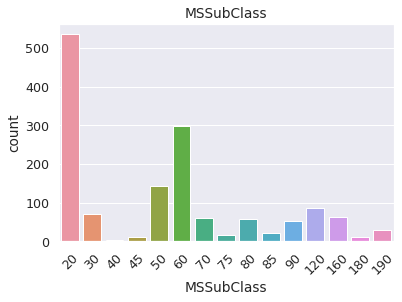

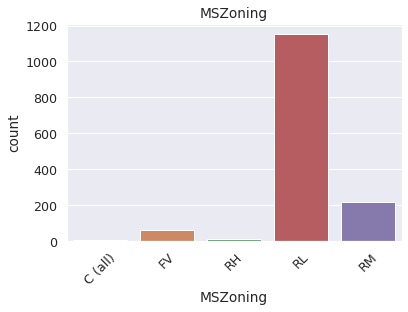

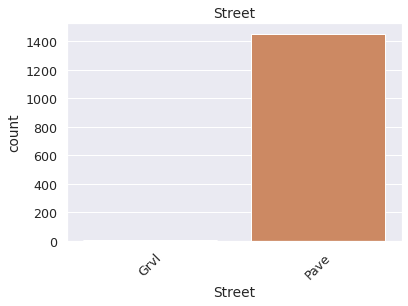

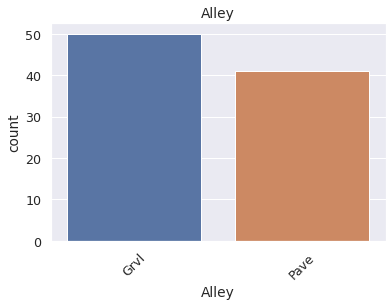

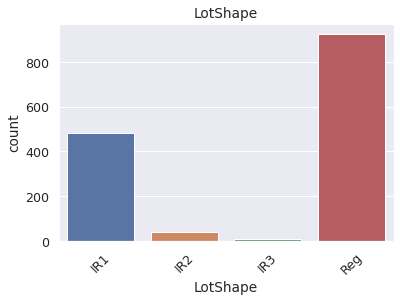

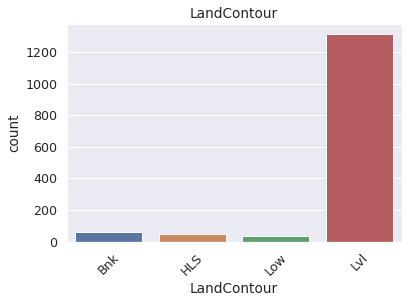

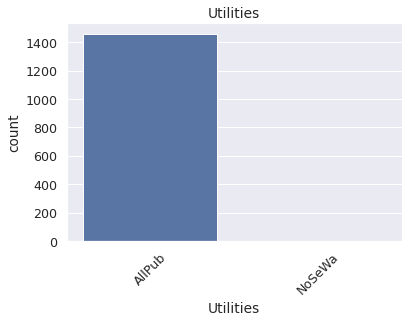

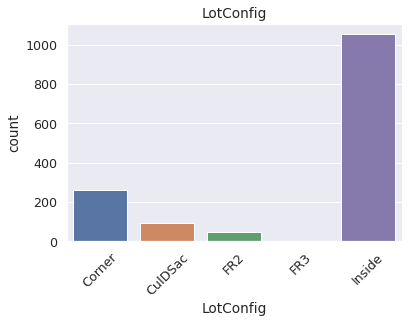

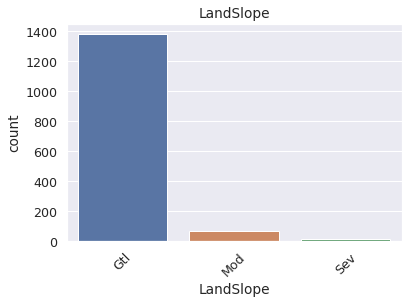

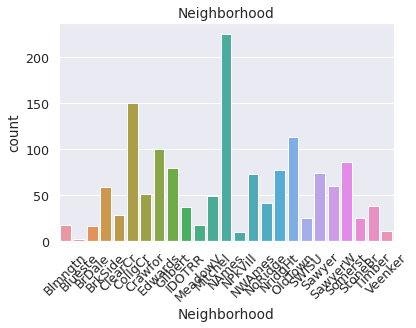

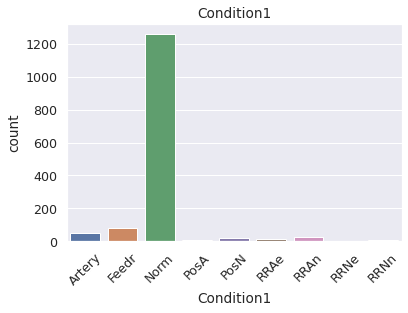

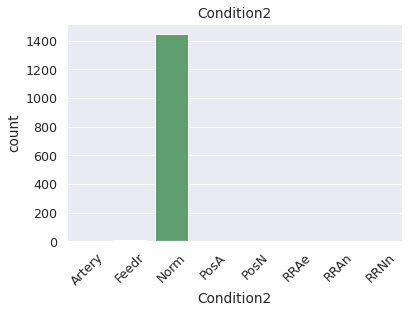

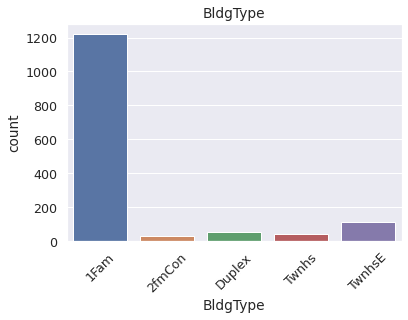

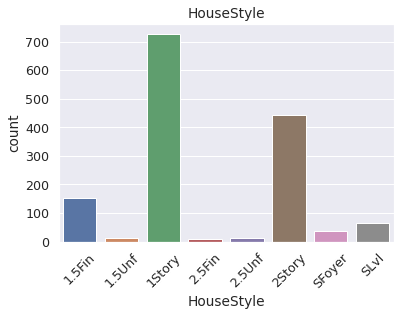

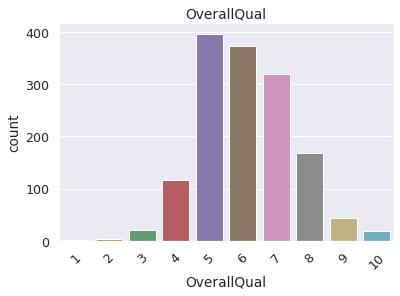

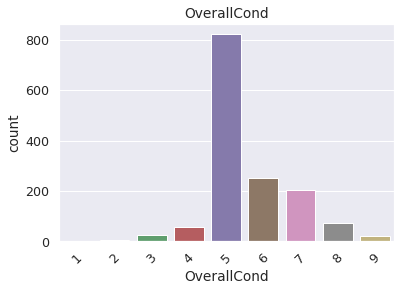

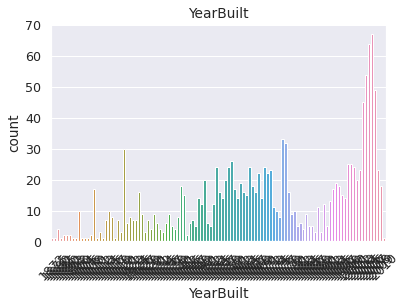

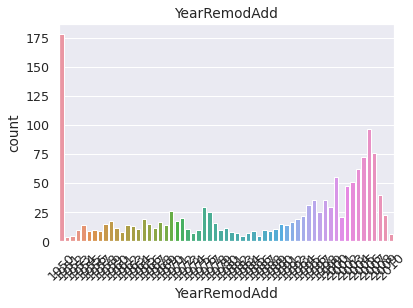

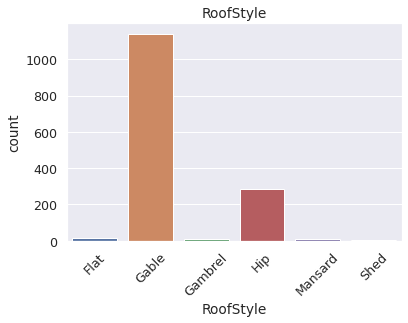

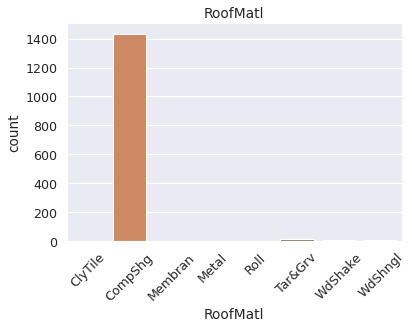

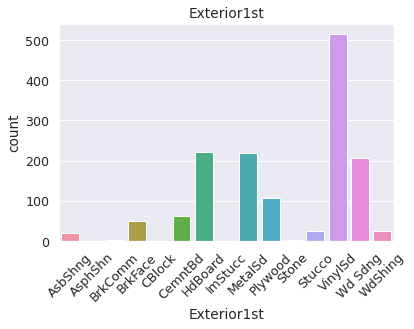

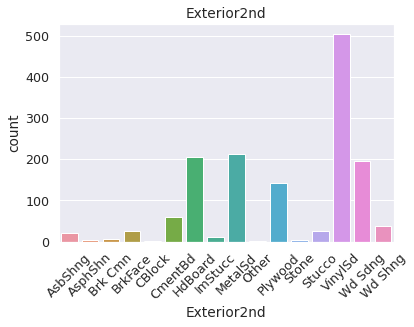

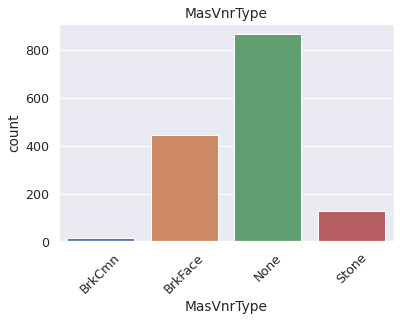

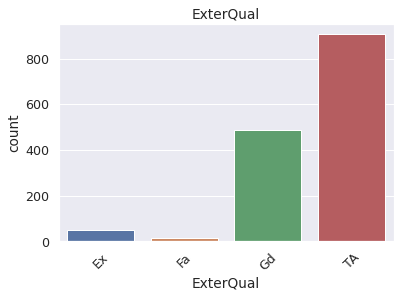

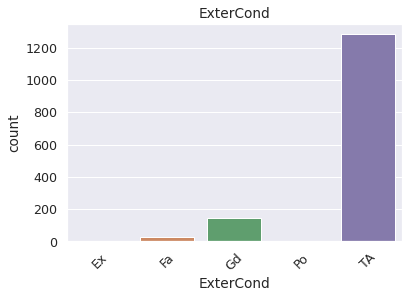

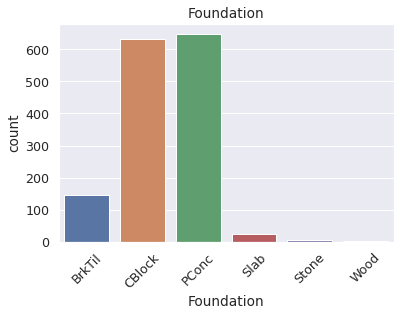

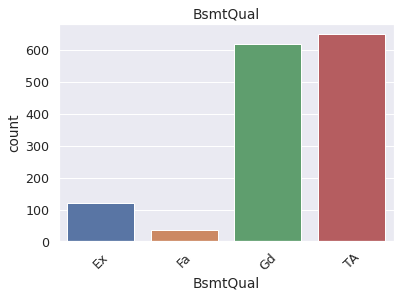

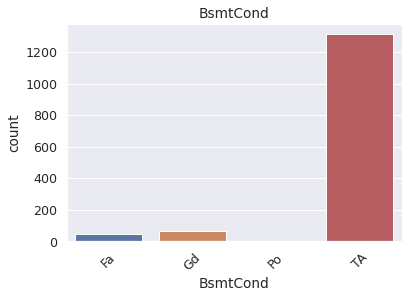

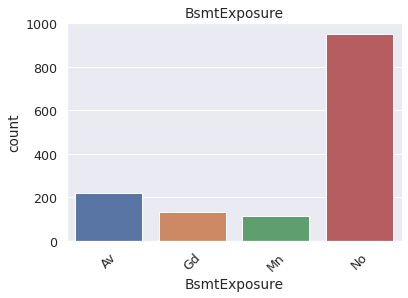

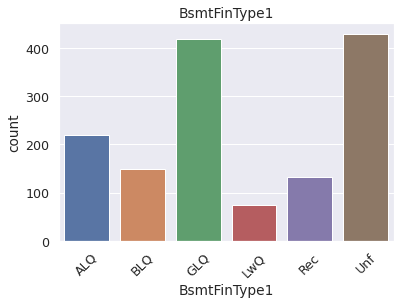

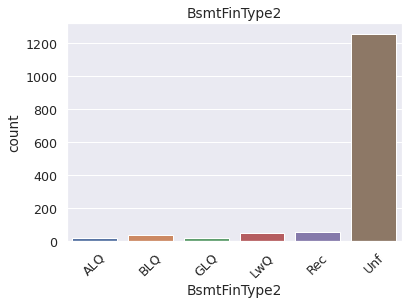

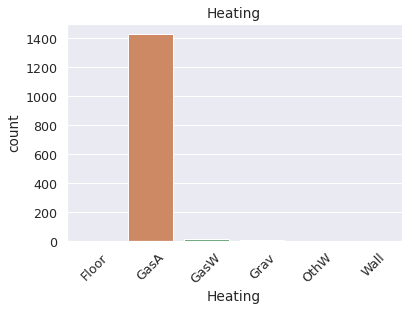

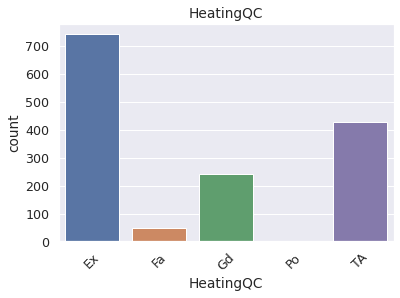

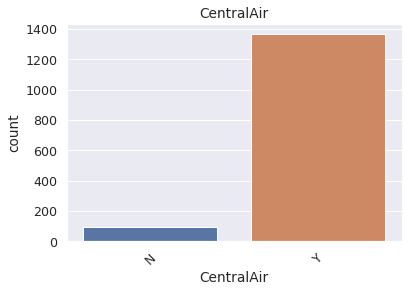

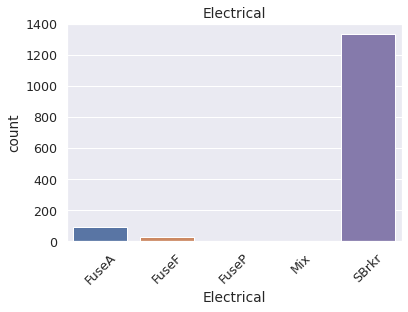

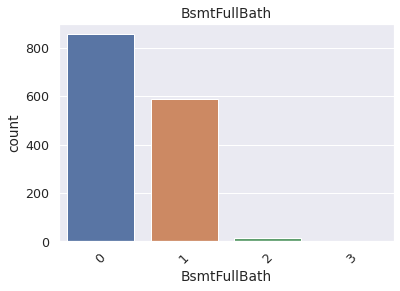

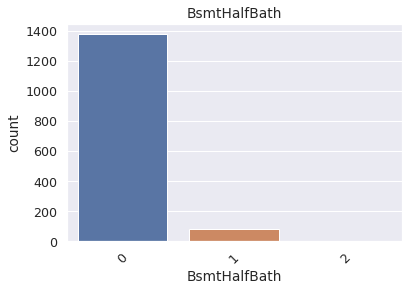

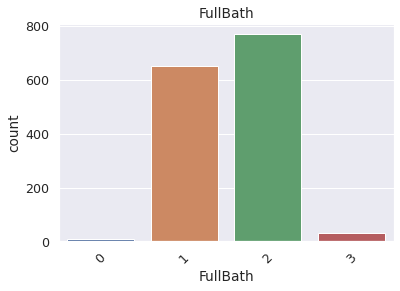

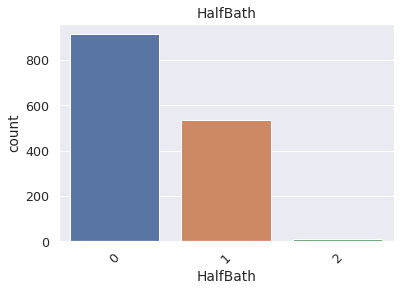

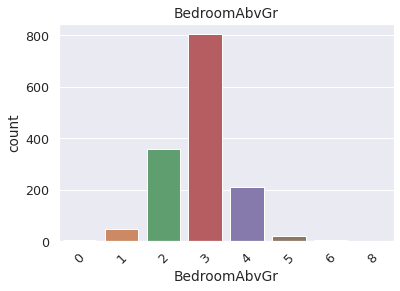

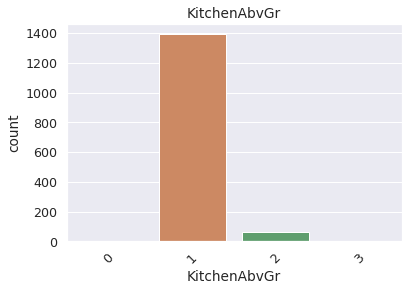

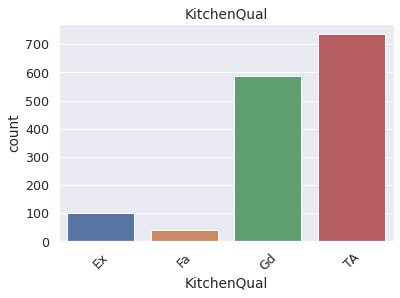

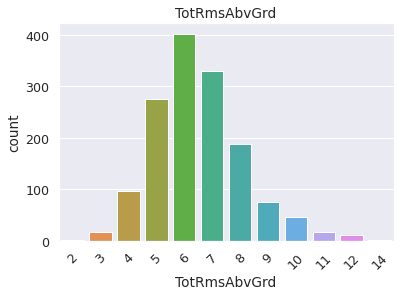

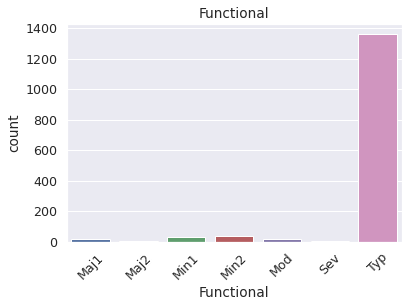

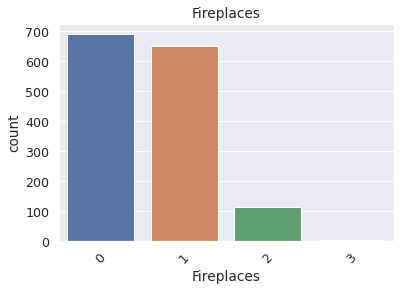

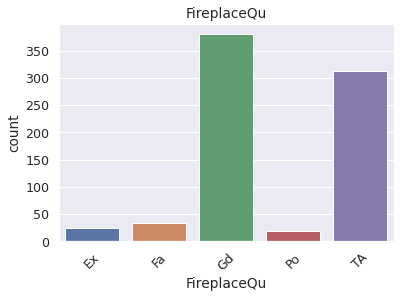

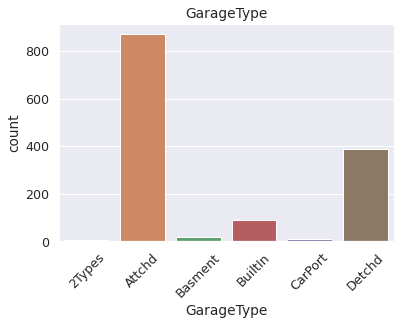

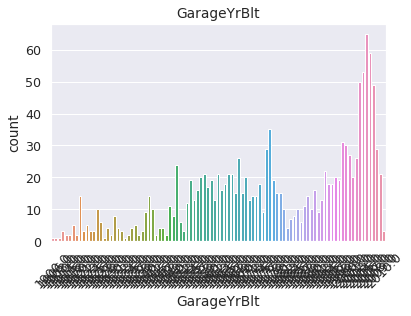

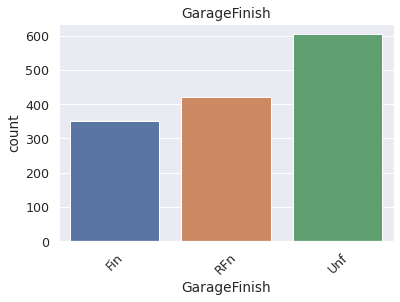

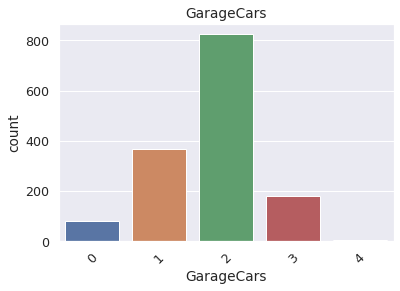

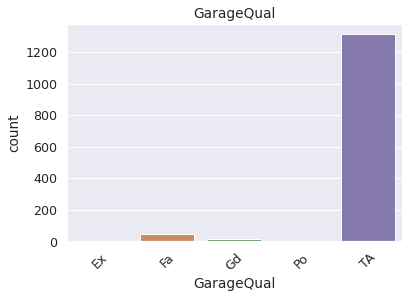

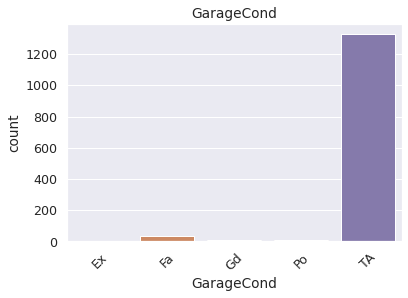

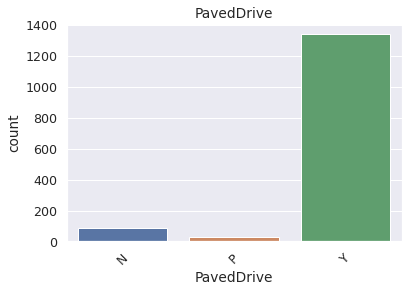

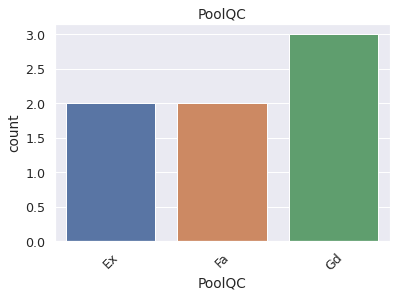

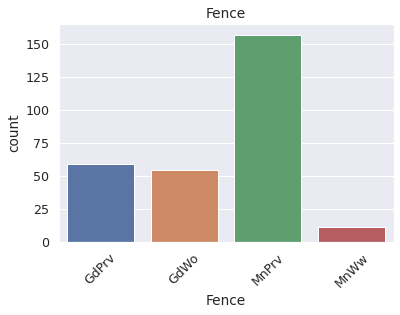

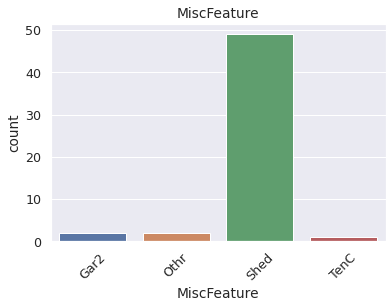

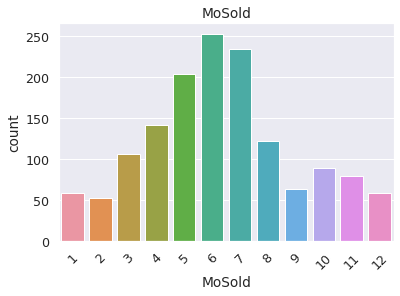

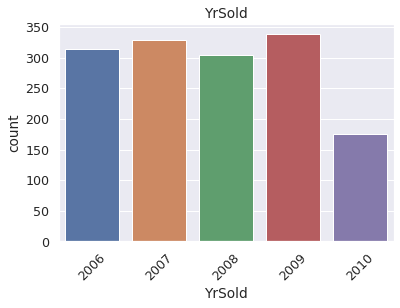

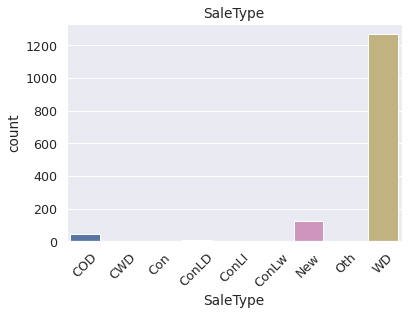

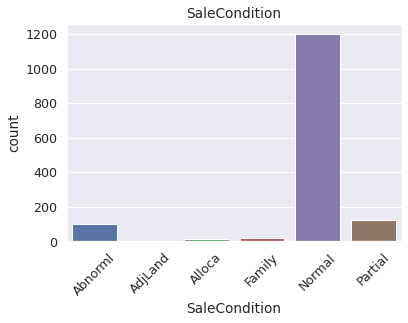

In [330]:
# ploting count plots for categorical variables
for i, var in enumerate(cat_var):
  plt.figure(i)
  ax = sns.countplot(x=var, data=df_train) # Counting the gender variable
  ax.set_title(var) # Setting the title
  ax.tick_params(axis='x', rotation=45)

In [331]:
# checking variables YearBuilt, YearRemodAdd and GarageYrBlt seperately
print(sorted([int(x) for x in list(df_train['YearBuilt'].unique())]))
print(sorted([int(x) for x in list(df_train['YearRemodAdd'].unique())]))
print(sorted([float(x) for x in list(df_train['GarageYrBlt'].unique())]))  #it has a missing values

[1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 20

For categorical variables everything looks okay. There is no mispelled entries and all the values look in the right and logical range. 

We noticed that there is a `nan` value in `GarageYrBlt` column that skews sorting values, but we will handle this in a next step.

Let's continue with numerical variables.

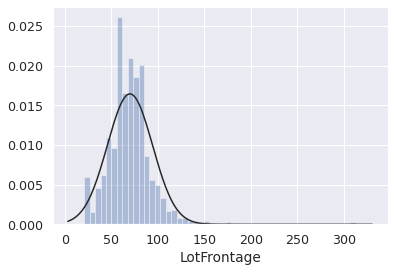

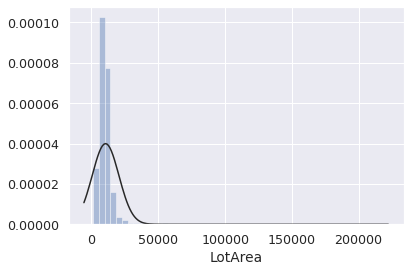

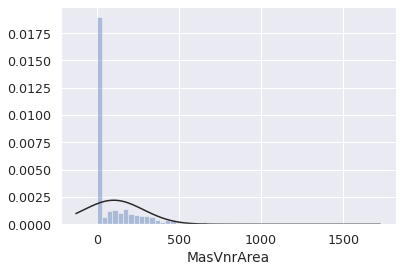

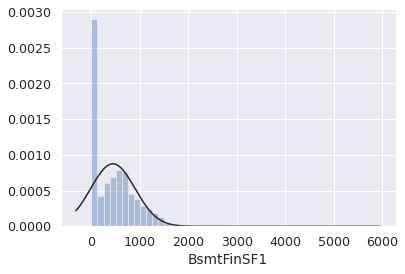

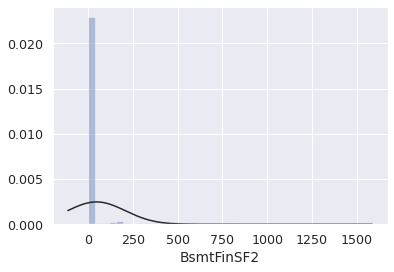

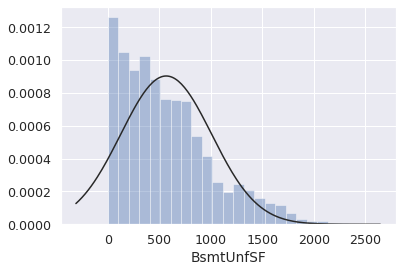

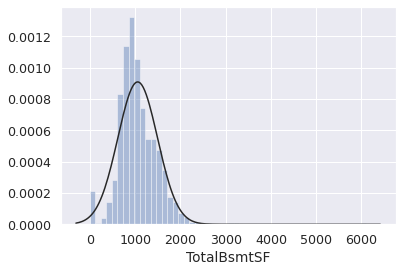

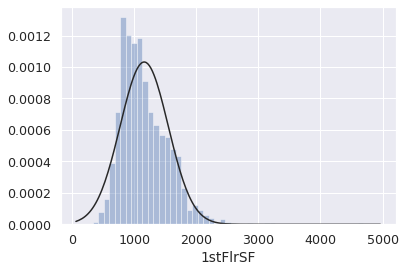

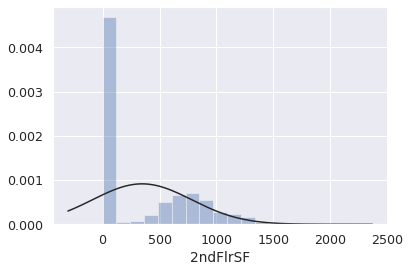

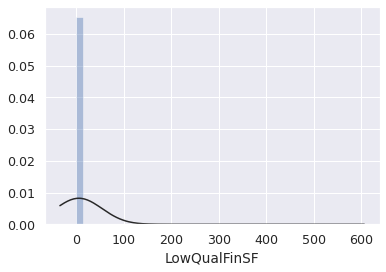

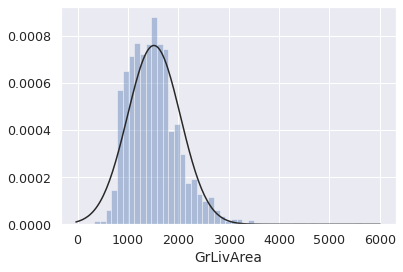

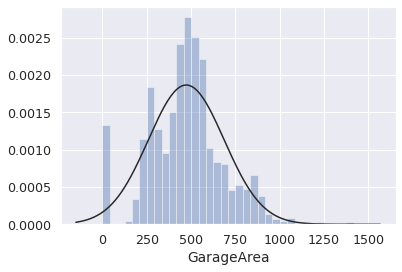

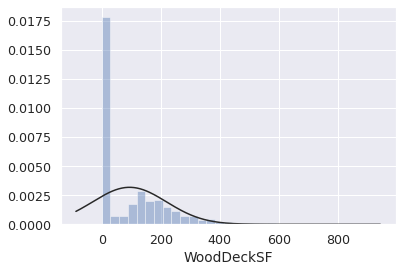

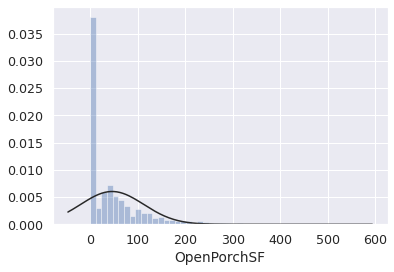

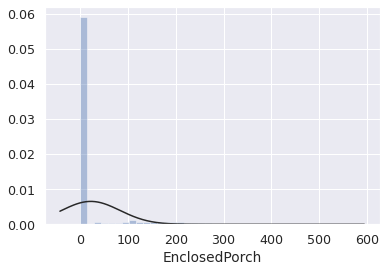

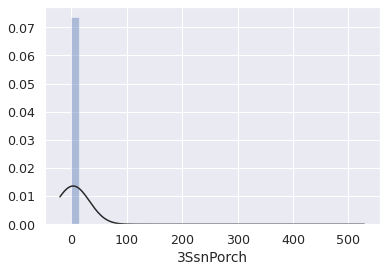

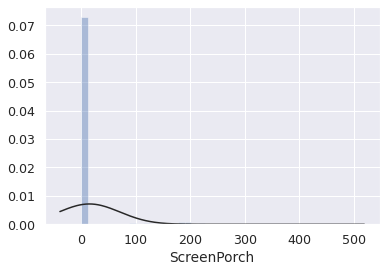

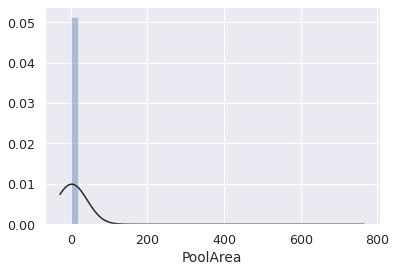

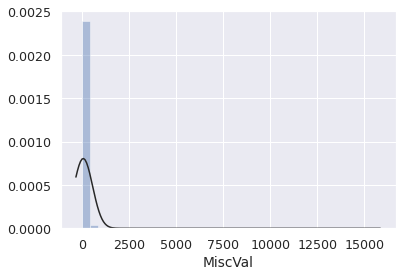

In [332]:
# ploting distribution plots of numerical variables
for i, var in enumerate(num_var):
  plt.figure(i)
  sns.distplot(df_train[var], kde=False, fit=stats.norm)  # kde=False doesn't plot the curve
  plt.show()

All numerical variables have values above 0 so the ranges have no errors. We notice that a few variables have outliers and that a lot of variables have their categorical twin, for example, `PoolArea` and `PoolQC`. As `PoolArea` has a lot of zeros, we expect `PoolQC` to have a lot of missing values.

#### 1.1.3. Managing missing values

There are three methods to deal with missing values:
1. *Drop columns with missing values*: Unless most values in the dropped columns are missing, the model loses access to a lot of (potentially useful!) information with this approach.

2. *Imputatuion*: fills in the missing values with some number. For instance, we can fill in the mean value along each column. Sometimes it makes more sense to set every missing value to a value of 0, to fill in the most frequently encountered value, or to use some other method. 

3. *An Extension to Imputation*: Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing. 

In [333]:
# get the table of all the columns and their percentage of missing values
missing = df_train.isna().sum().sort_values(ascending = False)/df_train.shape[0]
missing = missing[missing > 0]
missing

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
                  ...   
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Length: 19, dtype: float64

In [334]:
# drop the columns that have more than 80% of missing values
df_train = df_train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])
df_test = df_test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

As expected `PoolQC` has a lot of missing values as its numerical "twin" `PoolArea` has a lot of zeros, meaning there is no pool on the property. We will drop `PoolQC` variable. 

The `MiscFeature`, `Alley` and `Fence` have more than 80% of missing values which forces us to drop these three columns as well.

In [335]:
# analyzing FireplaceQu variable
print(df_train['FireplaceQu'].value_counts())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [336]:
# get the percentage of Gd and TA values
(380+313)/(380+313+33+24+20)

0.9

In [337]:
# dropping the FireplaceQu column
df_train = df_train.drop(columns=['FireplaceQu'])
df_test = df_test.drop(columns=['FireplaceQu'])

The variable `FireplaceQu` consists of 47.3% of missing values. It as well has a categorical "twin" called `Fireplaces`. If a house has a fireplace than 90% of those are either in Good or Average shape. For these two reasons we will drop the `FireplaceQu` as well.

In [338]:
# analyzing garage feature
df_garage = df_train[['GarageCars', 'GarageArea', 'GarageYrBlt', 'GarageCond', 'GarageQual', 'GarageType', 'GarageFinish']] 
df_garage_missing = df_garage[df_garage['GarageCars']==0]
df_garage_missing

,GarageCars,GarageArea,GarageYrBlt,GarageCond,GarageQual,GarageType,GarageFinish
Id,,,,,,,
40,0,0,NaN,NaN,NaN,NaN,NaN
49,0,0,NaN,NaN,NaN,NaN,NaN
79,0,0,NaN,NaN,NaN,NaN,NaN
89,0,0,NaN,NaN,NaN,NaN,NaN
90,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1350,0,0,NaN,NaN,NaN,NaN,NaN
1408,0,0,NaN,NaN,NaN,NaN,NaN
1450,0,0,NaN,NaN,NaN,NaN,NaN


In [339]:
# checking if all nans appear when GarageCars has value 0
print(df_garage.isna().sum().sort_values(ascending = False))
print(df_garage_missing.isna().sum().sort_values(ascending = False))

GarageYrBlt     81
GarageCond      81
GarageQual      81
GarageType      81
GarageFinish    81
GarageCars       0
GarageArea       0
dtype: int64
GarageYrBlt     81
GarageCond      81
GarageQual      81
GarageType      81
GarageFinish    81
GarageCars       0
GarageArea       0
dtype: int64


In [340]:
# chi-square test between GarageYrBlt and YearBuilt
cont_table  = pd.crosstab(df_train['GarageYrBlt'], df_train['YearBuilt'])
stats.chi2_contingency(cont_table, correction = False)

(79102.69083015177,
 0.0,
 10368,
 array([[0.00290065, 0.00072516, 0.00145033, ..., 0.01667875, 0.01305294,
         0.00072516],
        [0.00290065, 0.00072516, 0.00145033, ..., 0.01667875, 0.01305294,
         0.00072516],
        [0.00290065, 0.00072516, 0.00145033, ..., 0.01667875, 0.01305294,
         0.00072516],
        ...,
        [0.08411893, 0.02102973, 0.04205946, ..., 0.48368383, 0.37853517,
         0.02102973],
        [0.06091371, 0.01522843, 0.03045685, ..., 0.35025381, 0.27411168,
         0.01522843],
        [0.00870196, 0.00217549, 0.00435098, ..., 0.05003626, 0.03915881,
         0.00217549]]))

In [341]:
# temporery changing types to numerical to perform a Pearson's correlation test
df_train_temp_num = df_train[['YearBuilt', 'GarageYrBlt']].dropna()
df_train_temp_num['YearBuilt'] = df_train_temp_num['YearBuilt'].astype('int',copy=False)
df_train_temp_num['GarageYrBlt'] = df_train_temp_num['GarageYrBlt'].astype('int',copy=False)

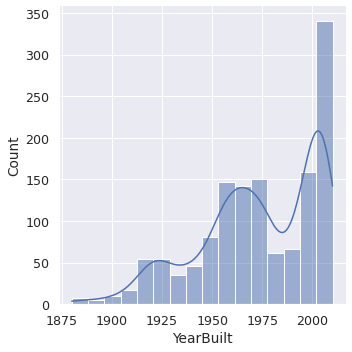

In [342]:
# checking the distribution of YearBuilt
ax = sns.displot(df_train_temp_num['YearBuilt'], kde=True)
plt.show()

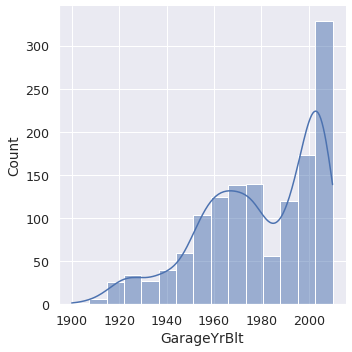

In [343]:
# checking the distribution of GarageYrBlt
ax = sns.displot(df_train_temp_num['GarageYrBlt'], kde=True)
plt.show()

In [344]:
# performing a Pearson's correlation test
stats.pearsonr(df_train_temp_num['YearBuilt'], df_train_temp_num['GarageYrBlt'])

(0.8256674841743421, 0.0)

For variables that represent the features of a garage, we notice that variables `GarageYrBlt`, `GarageCond`, `GarageQual`, `GarageType` and `GarageFinish` have missing values only when there is no garage (both `GarageArea` and `GarageCars` have values 0). We will add a new category called `Missing` and create an extra variable `Garage` with 0 and 1, where 0 represents an absence of the garage at the property and 1 its presence.

For the variable `GarageYrBlt` we would expect to have some association with either `YearBuilt` or `YearRemodAdd` as the garage is usually built in the beginning or when there was some remodeling going on. 

We used a `chi-square` test between `GarageYrBlt` and `YearBuilt` to test if there is any statistically significant association between these two variables. All the assumtions for `chi-square` test are met (two categorical variables, two or more categories for each variable and independence of observations). The `chi-square` test fails (p-value = 0) as probably there are too many categories (years) and only a few values in each category. 

We convert them temporarely into numerical variables and perform a Pearson's correlation test. Ploting both variables we see they do not satisfy the assumption of normal distributions of Pearson's test, but we notice they have very similar distribution. Ignoring this assumption the correlation test return the correlation coeficient of `0.82`, which is quite high correlation. Joining these two observation, we conclude to drop the variable `GarageYrBlt` as we have enough information in `YearBuilt`.

Variables `GarageCond` and `GarageQual` have very similar count plots and more than 90% of values are `TA`, which won't give a model any extra infromation. For this reason we can drop one of the variables and this will be `GarageCond`.

Let's add an extra category and a new variable for the garage feature.

In [345]:
# dropping the GarageYrBlt and GarageCond variables
df_train = df_train.drop(columns=['GarageYrBlt', 'GarageCond'])
df_test = df_test.drop(columns=['GarageYrBlt', 'GarageCond'])

# adding new category Missing

garage_var = ['GarageQual', 'GarageType', 'GarageFinish']
for var in garage_var:
    df_train[var] = df_train[var].cat.add_categories(['Missing'])
    df_test[var] = df_test[var].cat.add_categories(['Missing'])
    df_train[var] = df_train[var].fillna('Missing')
    df_test[var] = df_test[var].fillna('Missing')

df_train['Garage'] = [0 if x==0 else 1 for x in df_train['GarageArea']]
df_test['Garage'] = [0 if x==0 else 1 for x in df_test['GarageArea']]
df_train['Garage'] = df_train['Garage'].astype('category',copy=False)
df_test['Garage'] = df_test['Garage'].astype('category',copy=False)

In [346]:
# analyzing the basement feature

df_basement = df_train[['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]
df_basement_missing = df_basement[df_basement['TotalBsmtSF']==0]
print(df_basement.isna().sum().sort_values(ascending = False))
print(df_basement_missing.isna().sum().sort_values(ascending = False))

BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
dtype: int64
BsmtQual        37
BsmtCond        37
BsmtExposure    37
BsmtFinType1    37
BsmtFinType2    37
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
dtype: int64


In [347]:
# finding the two values of `BsmtExposure` and `BsmtFinType2` that are nan when `TotalBsmtSF` is not 0
pd.set_option('display.max_rows', None)
df_basement_anom = df_train[(df_train['TotalBsmtSF'] != 0) & ((df_train['BsmtExposure'].isnull()) | (df_train['BsmtFinType2'].isnull()))].T
df_basement_anom

Id,333,949
MSSubClass,20,60
MSZoning,RL,RL
LotFrontage,85.0,65.0
LotArea,10655,14006
Street,Pave,Pave
LotShape,IR1,IR1
LandContour,Lvl,Lvl
Utilities,AllPub,AllPub
LotConfig,Inside,Inside
LandSlope,Gtl,Gtl


In [348]:
# let's correct the two lines with error
df_train.loc[df_train.index == 333, 'BsmtFinType2'] = 'GLQ'

df_train = df_train.drop(labels=[949])
df_train.reset_index(drop=True, inplace=True)

In [349]:
# adding new category Missing
bsmt_var = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for var in bsmt_var:
    df_train[var] = df_train[var].cat.add_categories(['MissingBsmt'])
    df_test[var] = df_test[var].cat.add_categories(['MissingBsmt'])
    df_train[var] = df_train[var].fillna('MissingBsmt')
    df_test[var] = df_test[var].fillna('MissingBsmt')

df_train['Bsmt'] = [0 if x==0 else 1 for x in df_train['TotalBsmtSF']]
df_test['Bsmt'] = [0 if x==0 else 1 for x in df_test['TotalBsmtSF']]
df_train['Bsmt'] = df_train['Bsmt'].astype('category',copy=False)
df_test['Bsmt'] = df_test['Bsmt'].astype('category',copy=False)

We notice that the variables that describe basement (`BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`) have missing values when `TotalBsmtSF` indicate there is no basement on the property. 

There are 2 special cases:
- there is an entry when `BsmtFinType2` is NaN but other variables do indicate basement exists. We fill the value from `BsmtFinType1` as it's done in other entries.
- there is an entry when `BsmtExposure` is NaN but other variables do indicate basement exists. This is an error. We must delete this row.

We added a new category to `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`called `MissingBsmt` and filled the missing values. We added a new feature to the dataframe called `Bsmt` that takes values 0 and 1, where 0 indicates that there is no basement and 1 indicates its presence. 

*Another option would be filling out the missing values, with observing the other variables of the houses and filling them out with the values of the houses that are most similar (clustering or simple filtering would be helpful here). We would need to take care that the filled out values make sense as a group.*

Let's continue with the variables `MasVnrArea` and `MasVnrType`.

In [350]:
# Checking if both variables have NaN-s at the same time
df_mas = df_train[['MasVnrArea', 'MasVnrType']]
df_mas_null = df_mas[df_mas['MasVnrType'].isnull()]
print(df_mas_null, '\n')
print(df_mas.isna().sum(), '\n')
print(len(df_mas_null))

      MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
972          NaN        NaN
976          NaN        NaN
1242         NaN        NaN
1277         NaN        NaN 

MasVnrArea    8
MasVnrType    8
dtype: int64 

8


In [351]:
# Checking if there exists 0 in MasaVnrArea and the value of MasVnrType when it has a 0

print(df_mas[df_mas['MasVnrArea']==0])

      MasVnrArea MasVnrType
1            0.0       None
3            0.0       None
5            0.0       None
8            0.0       None
9            0.0       None
10           0.0       None
12           0.0       None
15           0.0       None
17           0.0       None
18           0.0       None
19           0.0       None
21           0.0       None
23           0.0       None
24           0.0       None
26           0.0       None
28           0.0       None
29           0.0       None
30           0.0       None
31           0.0       None
32           0.0       None
33           0.0       None
36           0.0       None
38           0.0       None
39           0.0       None
41           0.0       None
42           0.0       None
43           0.0       None
44           0.0       None
46           0.0       None
47           0.0       None
48           0.0       None
49           0.0       None
50           0.0       None
51           0.0       None
52           0.0    

We will fill out the missing values of `MasVnrArea` with zeros and missing values of `MasVnrType` with `None`. 

We noticed that there are two entries where `MasVnrArea` is 0 but `MasVnrType` is not `None` (one has value `Stone` and the other `BrkFace`). That seems impossible as no  Masonry veneer area exists. We will correct those two values and set them to `None`.

In [352]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('None')
df_train.loc[df_train['MasVnrArea'] == 0, 'MasVnrType'] = 'None'
df_test.loc[df_test['MasVnrArea'] == 0, 'MasVnrType'] = 'None'

Next `LotFrontage`. Let's check if there is any significant correlation with other numerical variables or with dependent variable `SalePrice`.

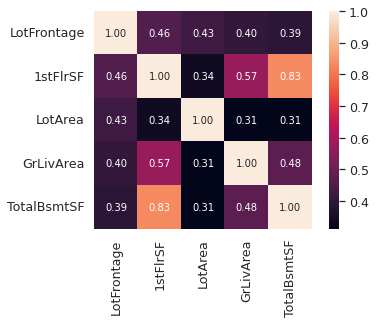

In [353]:
df_train_lotfront = df_train[df_train['LotFrontage'].notnull()]

corrmat = df_train_lotfront.corr()
cols = corrmat.nlargest(5, 'LotFrontage')['LotFrontage'].index  # Get first 5 variables that are most correlated with LotFrontage
cm = np.corrcoef(df_train_lotfront[cols].values.T)
sns.set(font_scale=1.15)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [354]:
df_train = df_train.drop(columns=['LotFrontage'])
df_test = df_test.drop(columns=['LotFrontage'])

There isn't any variable that would be correlated with `LotFrontage`, but because more than 17% of the values are missing values we decide to drop this column as well.

Let's check the last variable `Electrical`.

In [355]:
df_train[df_train['Electrical'].isnull()]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Garage,Bsmt
1378,80,RL,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,...,0,0,0,5,2008,WD,Normal,167500,1,1


There is only one entry. We dropped this entry.

In [356]:
pd.set_option('display.max_rows', 10)

#Updating the lists of categorical and numerical variables.
cat_var = list(df_train.select_dtypes(include=['object', 'category']).columns)  
num_var = list(df_train.select_dtypes(include=['number']).columns)

#print(df_train.columns)

#### 1.1.4. Transformation and feature creation of numeric variables

We noticed from distribtuion plots of numerical variables that they express a deviation from normal distribution and some of the variables have a large amount of zeros as a result of absence of the feature at the property.

We will do the following:
- try to approximate the distributions to normal distribution using transformations (like log transformation)
- create extra features that express the presence/absence of the feature at the property.


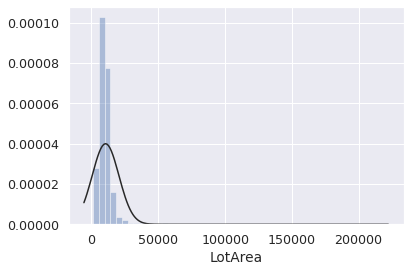

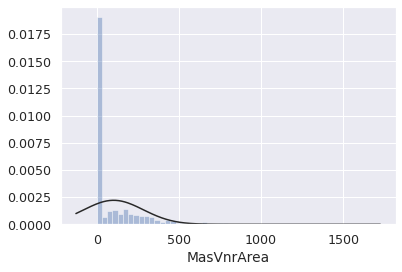

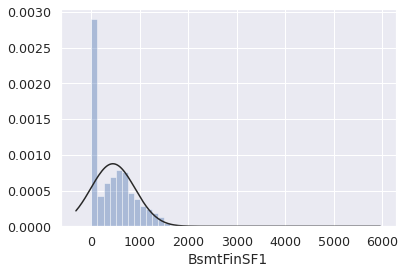

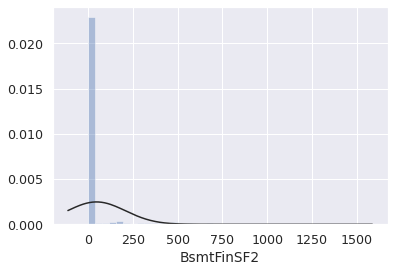

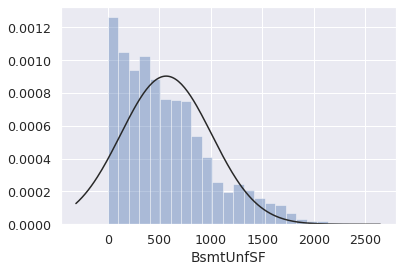

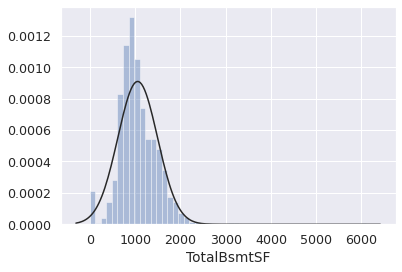

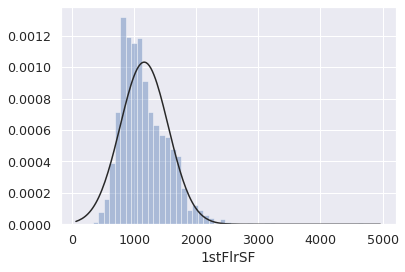

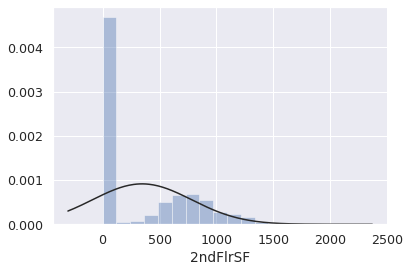

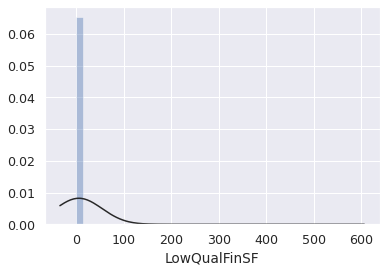

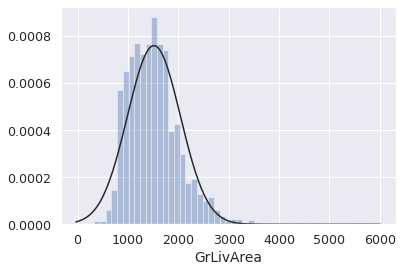

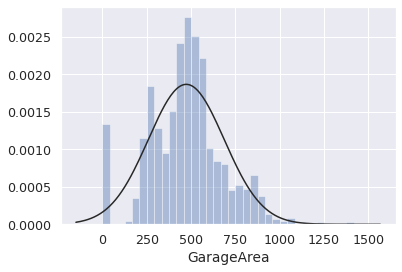

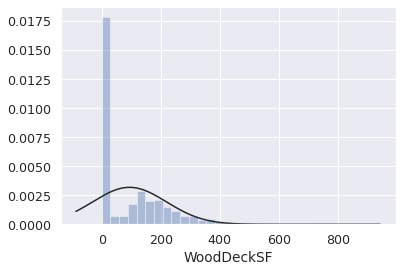

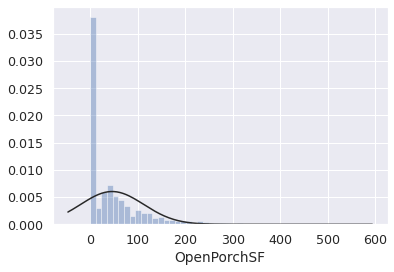

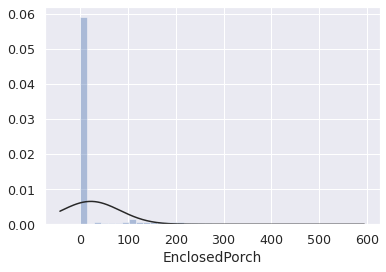

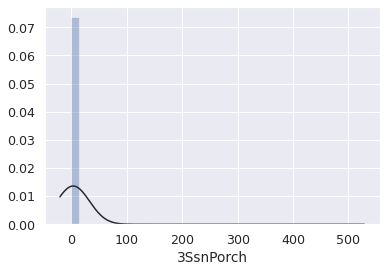

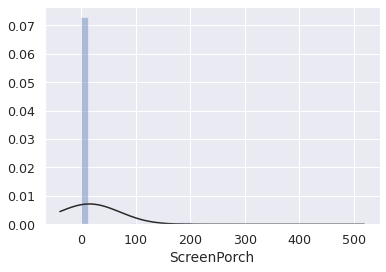

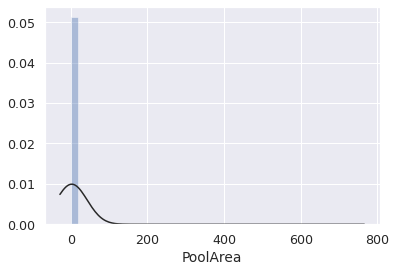

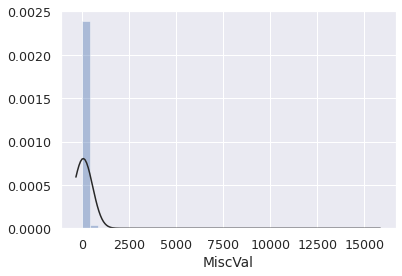

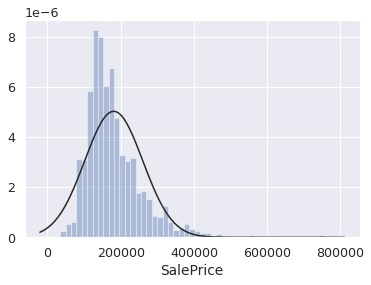

In [357]:
for i, var in enumerate(num_var):
  plt.figure(i)
  sns.distplot(df_train[var], kde=False, fit=stats.norm)  # kde=False doesn't plot the curve
  plt.show()

TotalBsmtSF
GrLivArea


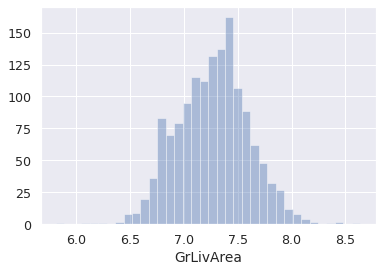

LotArea


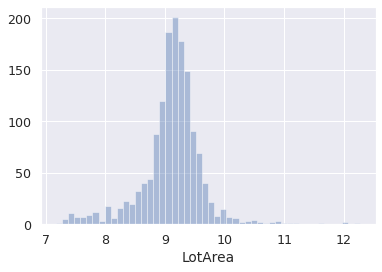

BsmtUnfSF
1stFlrSF


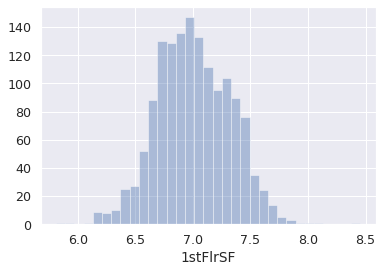

2ndFlrSF


In [358]:
var_for_log = ['TotalBsmtSF', 'GrLivArea', 'LotArea', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF']
for i, var in enumerate(var_for_log):
  print(var)
  if 0 in list(df_train[var].unique()):
    continue
  df_train[var] = np.log(df_train[var])
  plt.figure(i)
  sns.distplot(df_train[var], kde=False)  # kde=False doesn't plot the curve
  plt.show()

### 1.2. Dependent variable analysis `SalePrice`


In [359]:
df_train['SalePrice'].describe()

count      1459.000000
mean     180913.259767
std       79469.162925
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The minimum value is positive. That's encouraging.

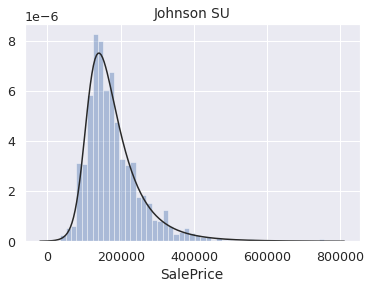

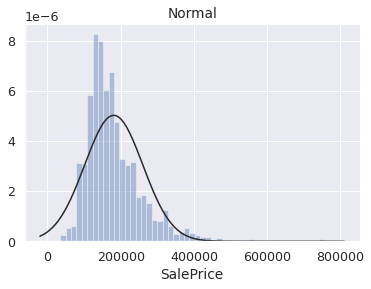

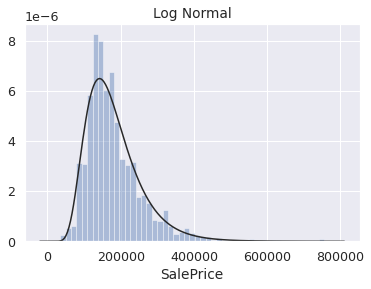

In [360]:
plt.figure(1); 
plt.title('Johnson SU')
sns.distplot(df_train['SalePrice'], kde=False, fit=stats.johnsonsu)
plt.figure(2); 
plt.title('Normal')
sns.distplot(df_train['SalePrice'], kde=False, fit=stats.norm)
plt.figure(3); 
plt.title('Log Normal')
sns.distplot(df_train['SalePrice'], kde=False, fit=stats.lognorm)

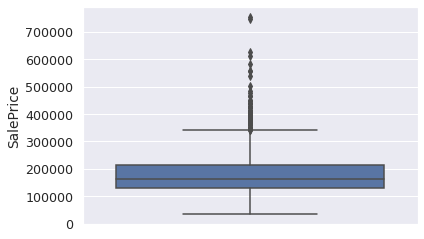

In [361]:
sns.boxplot(y=df_train['SalePrice'])

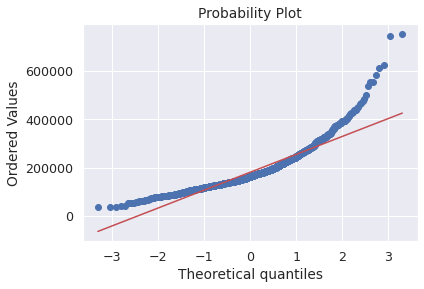

In [362]:
res = stats.probplot(df_train['SalePrice'], plot=plt)

`SalePrice` deviates from normal distribution, it's right-tailed and has a strong peak.

In [363]:
print("Skewness: ", df_train['SalePrice'].skew())
print("Kurtosis: ", df_train['SalePrice'].kurt())

Skewness:  1.8825711731659724
Kurtosis:  6.5307956886195875


**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry.
- Symmetric data should have a skewness near zero. 
- *Negative* values for the skewness indicate data that are skewed *left*.
- *Positive* values for the skewness indicate data that are skewed *right*. 
- If the data are multi-modal, then this may affect the sign of the skewness.
> Our skewness value is `1.883`, detecting the skewness on the right (also seen in the histogram).

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 
- Data sets with *high* kurtosis tend to have heavy tails, or outliers. 
- Data sets with *low* kurtosis tend to have light tails, or lack of outliers.
> Our kurtosis value is `6.536` indicating heavy tails. Observing the histogram it has a heavy right tail.

*Warning:* Skewness and kurtosis measures can be disorted by extreme values in the tails (as the mean and standard deviation).

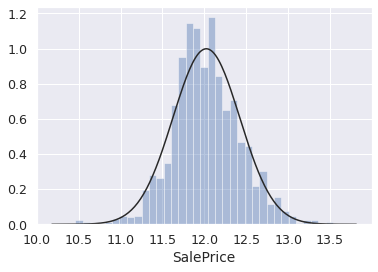

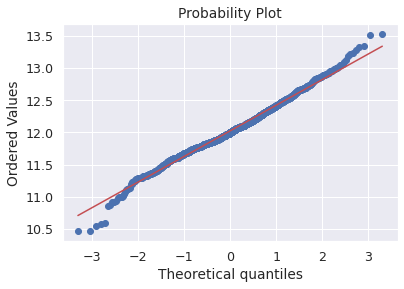

In [364]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
sns.distplot(df_train['SalePrice'], kde=False, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

A simple log transformation approximates `SalePrice` variable to normal distribution (though it does not make it normally distributed). 

### 1.3. Relationship between independent and dependent variables

#### 1.3.1. Numerical independent variables and dependent variable `SalePrice`

We will use correlation matrix (heatmap) and scatterplots to explore the relationships.

74


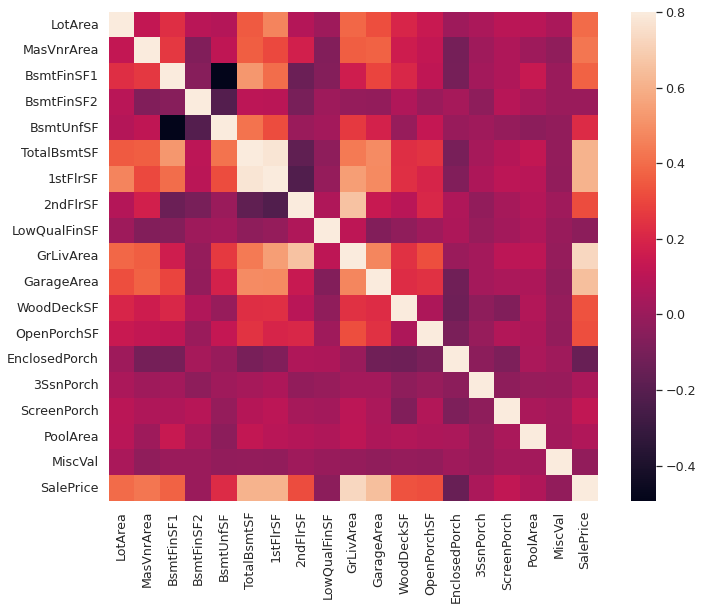

In [365]:
corrmat = df_train.corr()
print(len(df_train.columns))
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

We can notice there is some strong correlation between `TotalBsmtSF` and `1stFlrSF`.

Observing our dependant variable `SalePrice` we notice there are a few independent variables that it has some correlation with. Lets take a closer look to the first 5 most correlated variables.

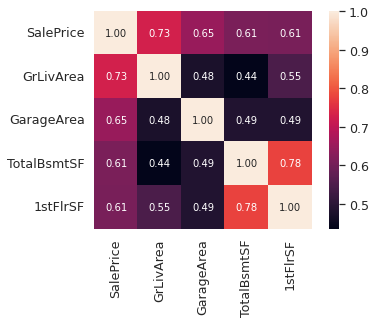

In [366]:
cols = corrmat.nlargest(5, 'SalePrice')['SalePrice'].index  # Get first 10 variables that are most correlated with SalePrice
cm = df_train[cols].corr()
sns.set(font_scale=1.15)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The most correlated independent numerical variable is `GrLivArea`, followed by `GarageArea`. We want to keep an eye on `TotalBsmtSf` and `1stFlrSF` that express correlation to avoid multicolinearity.

Let's plot some scatterplots between these variables.

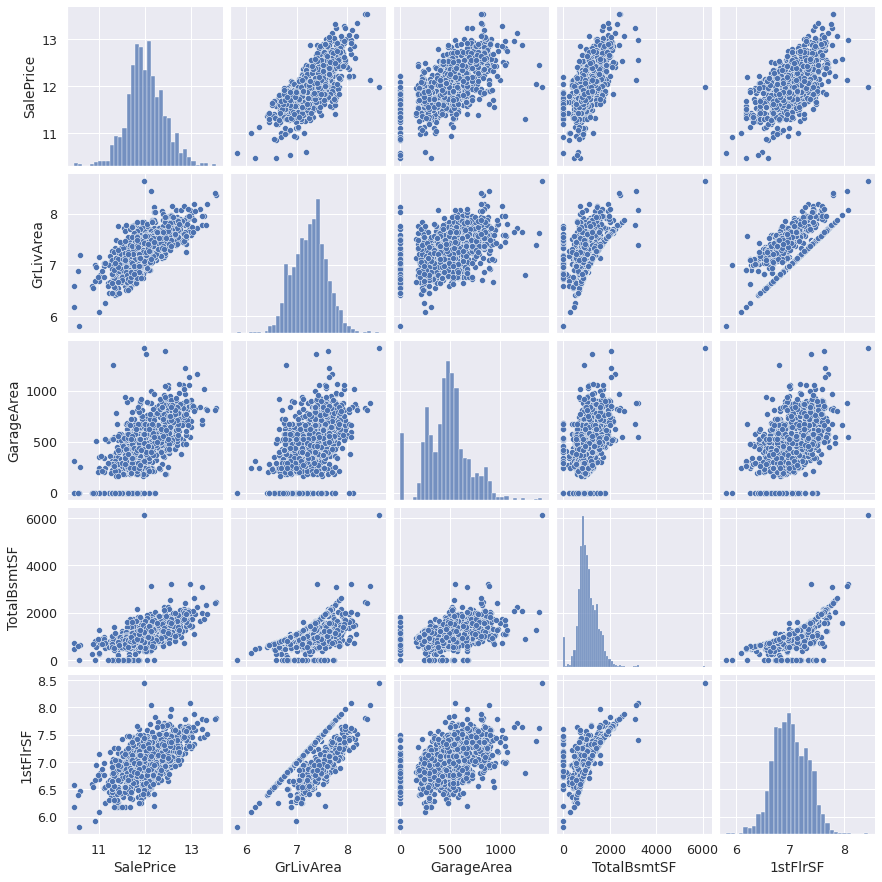

In [367]:
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

We see that the assumption of homoscedasticity (assumption that dependent variable exhibit equal levels of variance across the range of predictor variable) is satisfied. Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Let's plot scatterplots for all numerical variables to check for outliers.

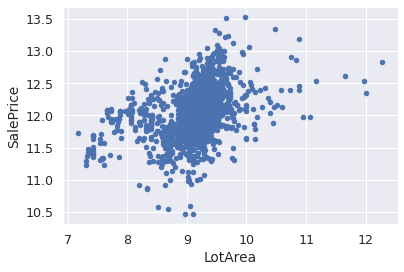

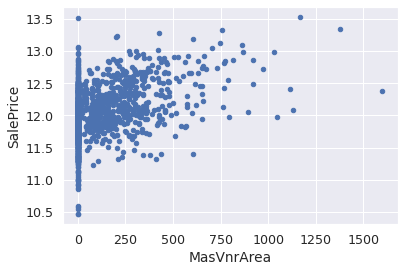

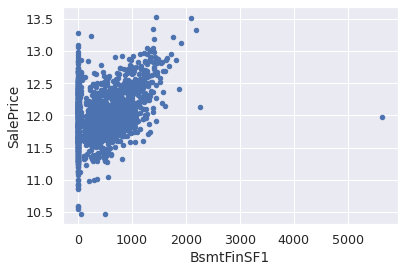

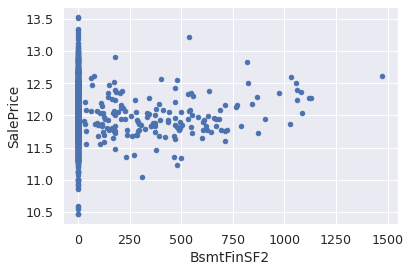

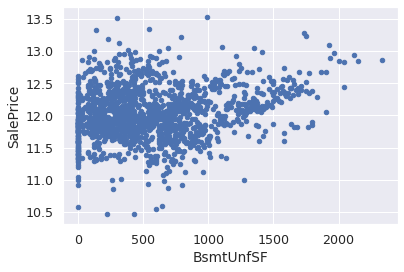

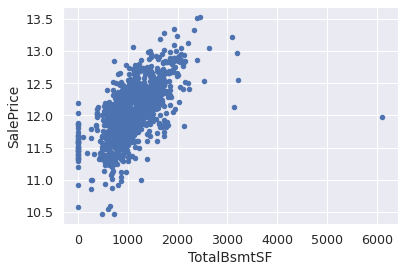

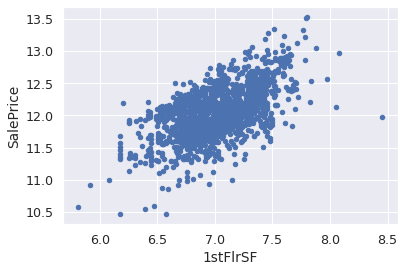

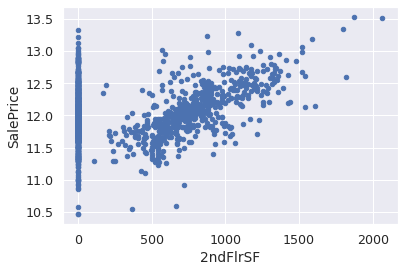

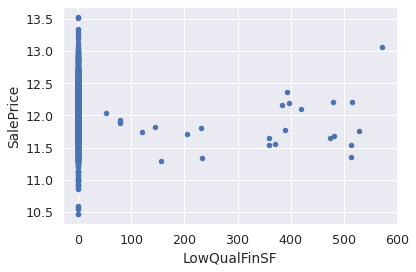

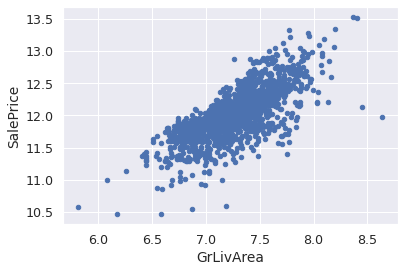

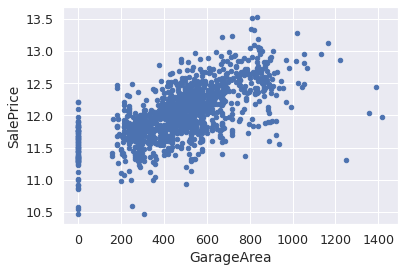

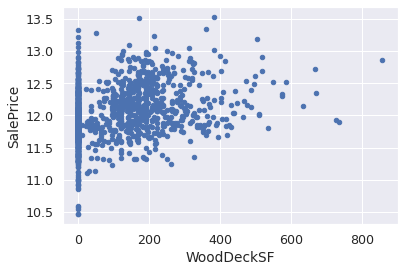

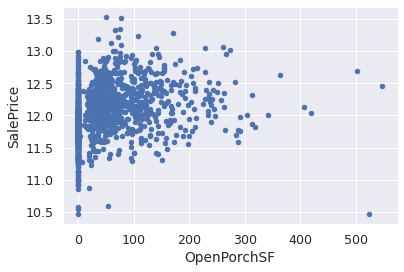

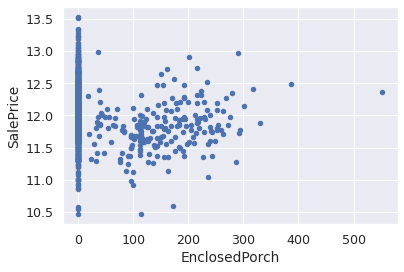

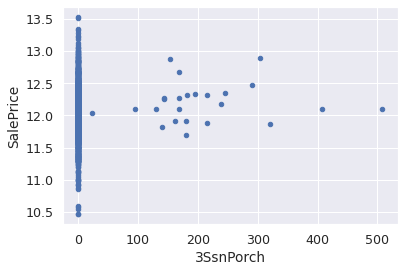

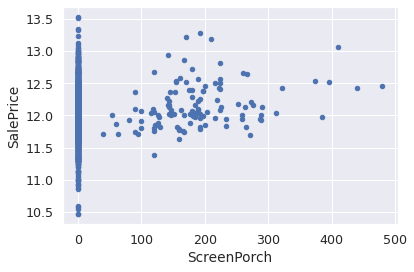

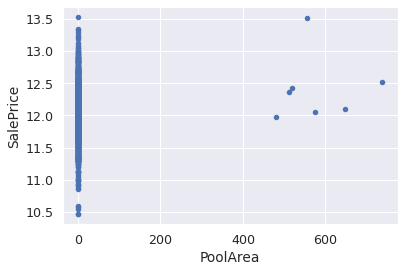

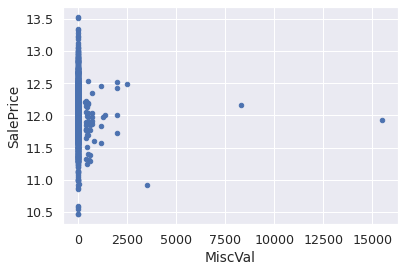

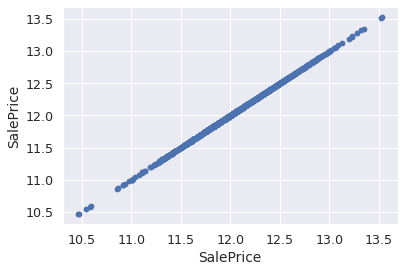

In [368]:
for var in num_var:
  data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
  data.plot.scatter(x=var, y='SalePrice');

There are noticable outliers in variables `BsmtFinSF1`, `TotalBsmtSF`, `OpenPorchSF`, `GarageArea` and `GrLivArea`. Let's handle those.

In [369]:
# Delete one outlier of 'BsmtFinSF1'
df_train = df_train[df_train['BsmtFinSF1']<5000]

# Delete 1 outlier of 'TotalBsmtSF'
df_train = df_train[df_train['TotalBsmtSF']<5000]

# Delete 1 outlier of 'OpenPorchSF'
df_train = df_train[~((df_train['OpenPorchSF']>500) & (df_train['SalePrice']<11))]

# Delete 2 outlier of 'GrLivArea'
df_train = df_train[~((df_train['GrLivArea']>8) & (df_train['SalePrice']<12.5))]

# Delete 4 outlier of 'GarageArea'
df_train = df_train[~((df_train['GarageArea']>1200) & (df_train['SalePrice']<12.5))]

# Delete 1 outlier of '1stFlrSF'
df_train = df_train[df_train['1stFlrSF']<8.25]

#### 1.3.2. Categorical independent variables and dependent variable `SalePrice`

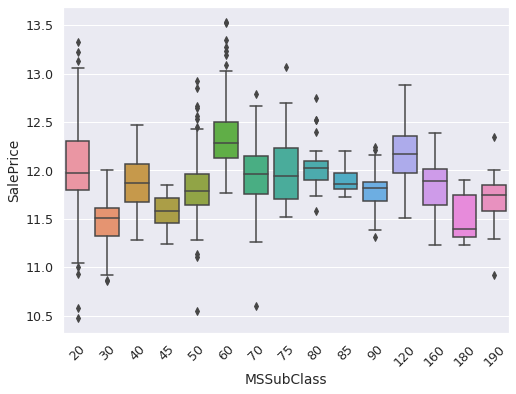

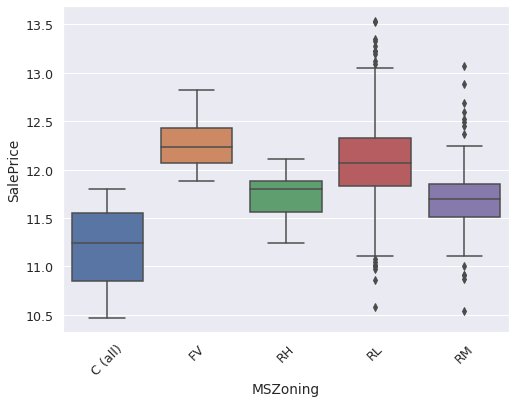

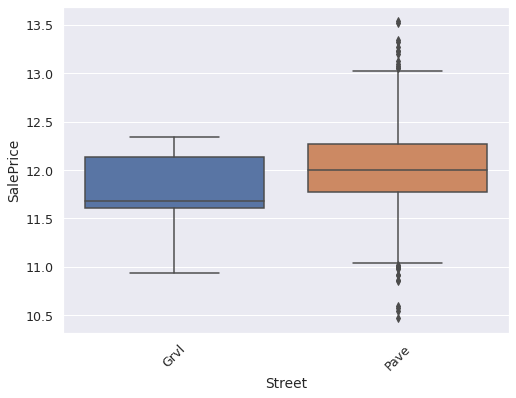

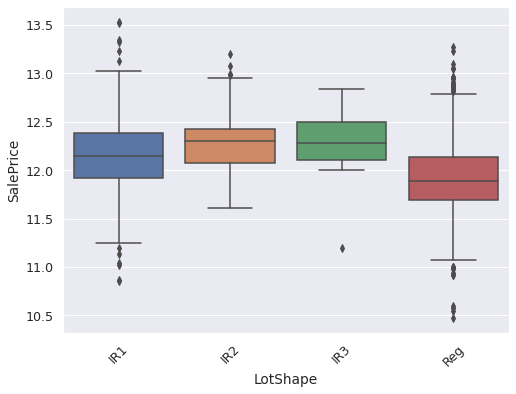

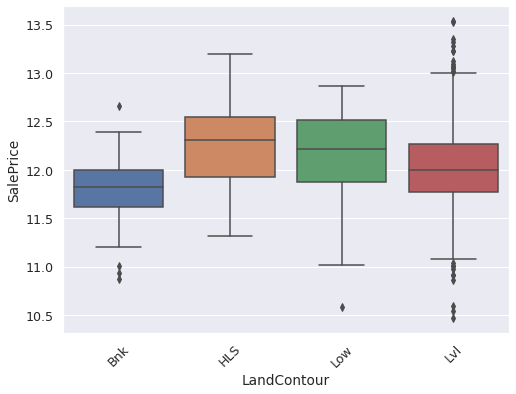

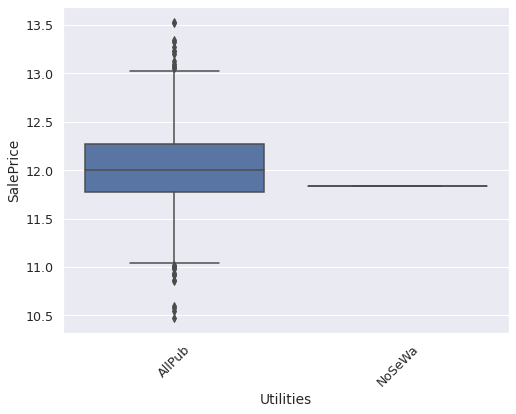

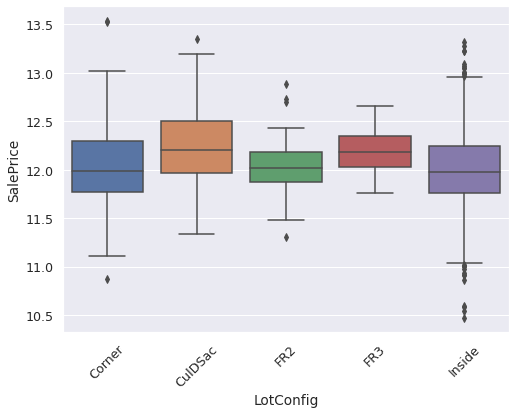

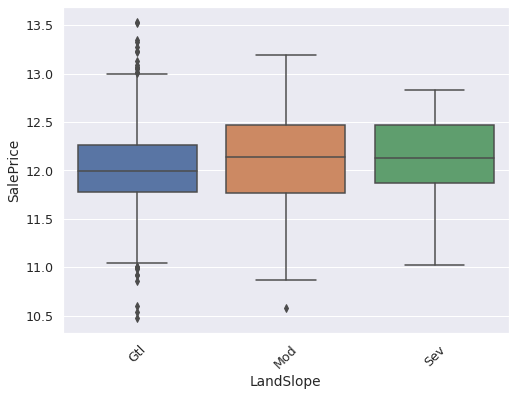

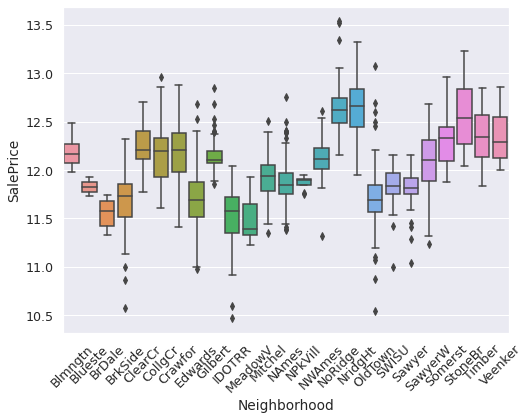

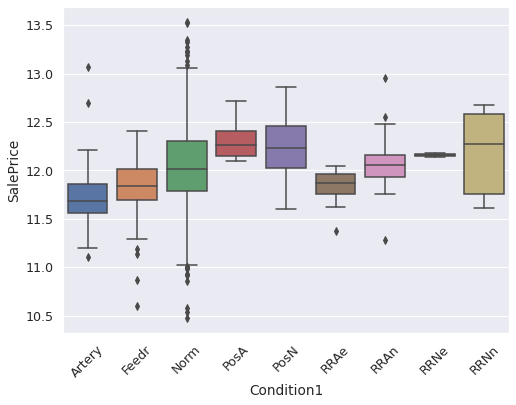

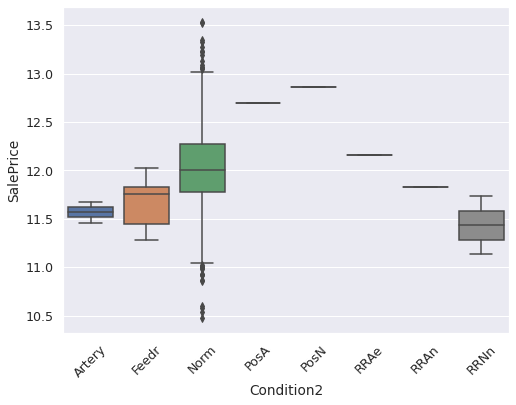

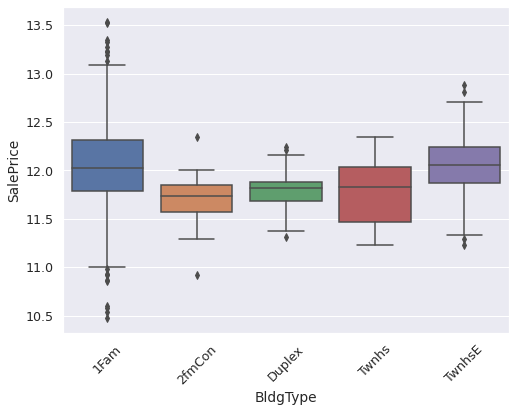

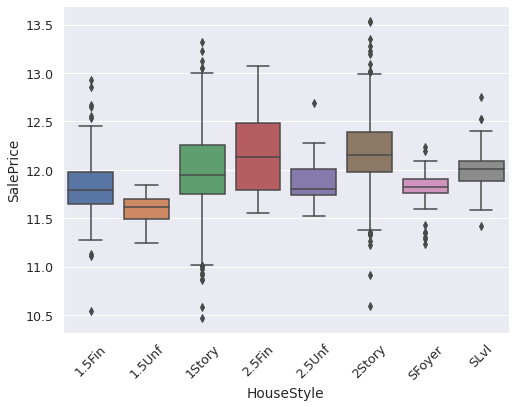

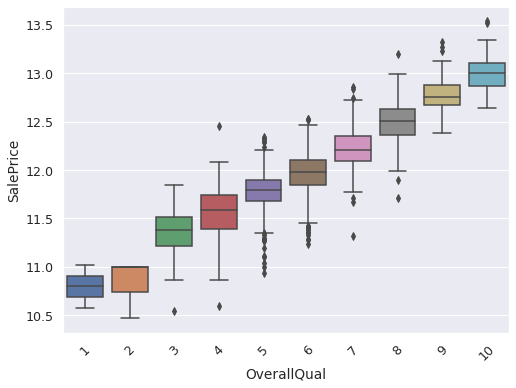

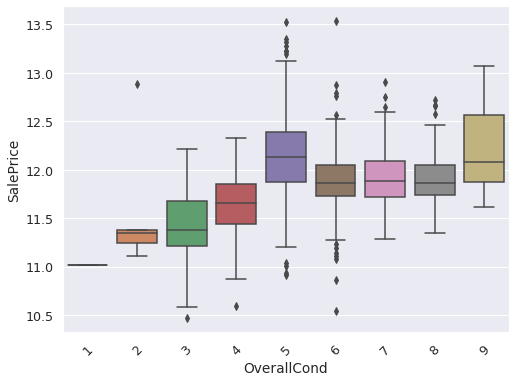

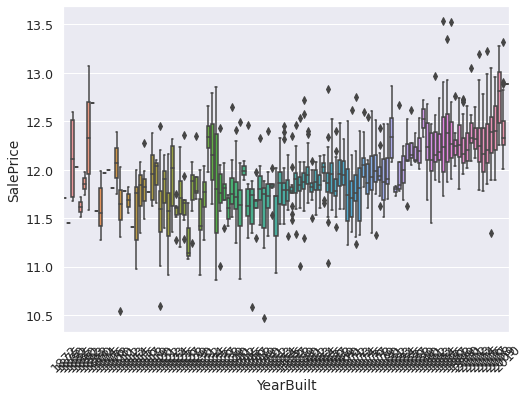

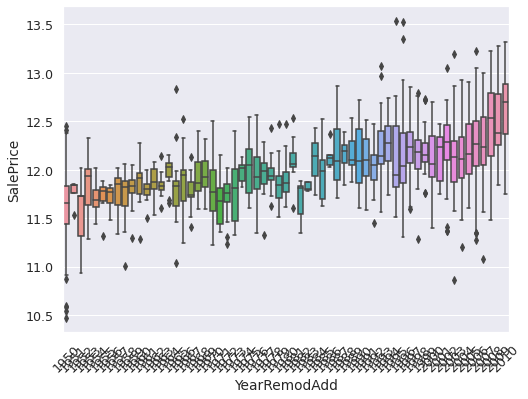

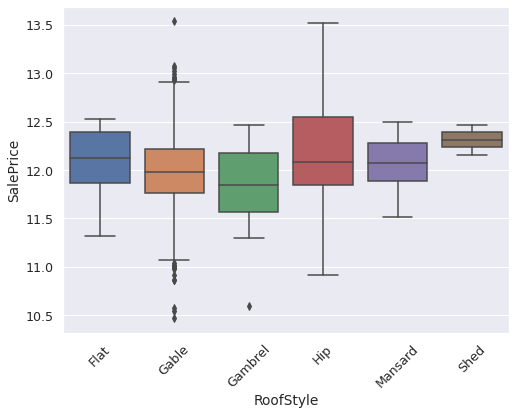

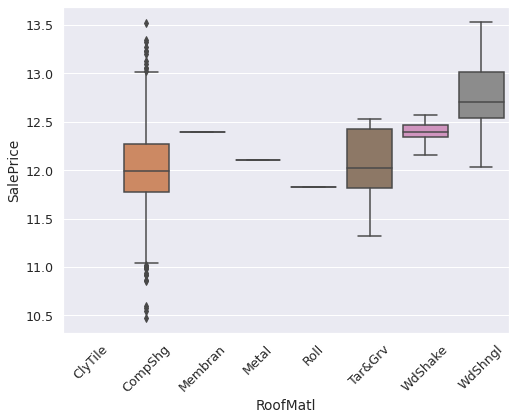

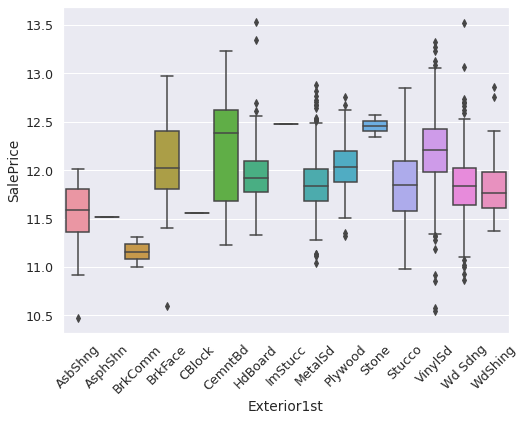

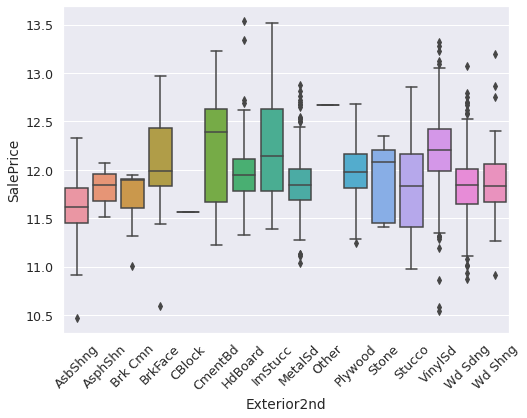

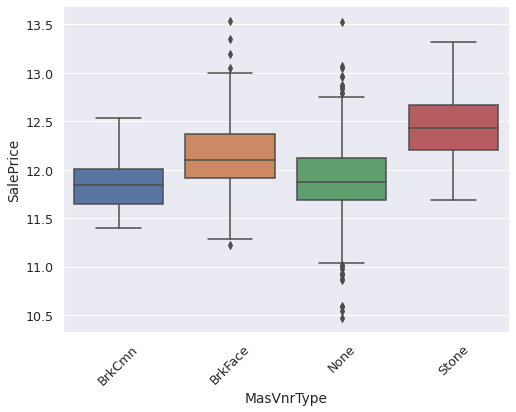

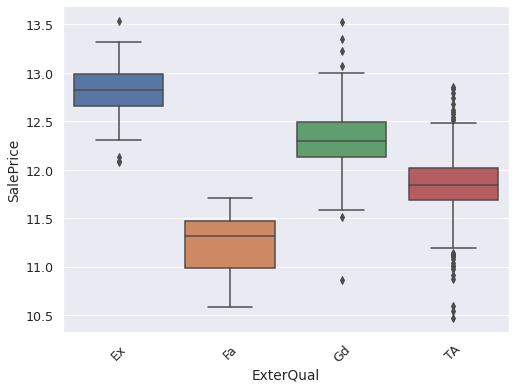

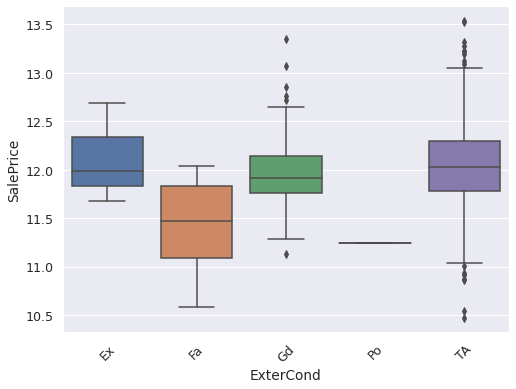

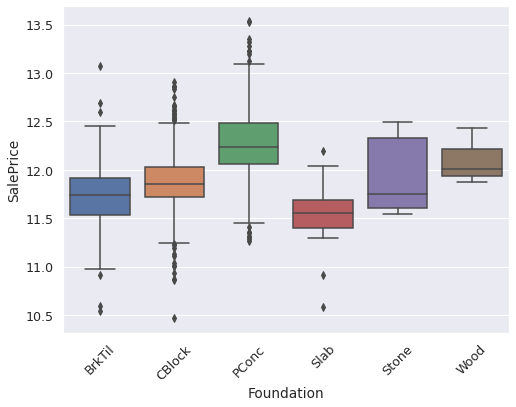

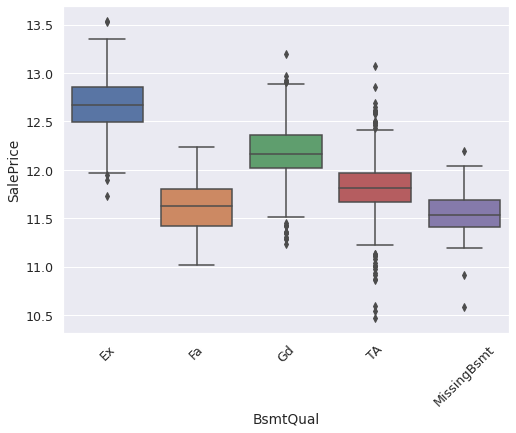

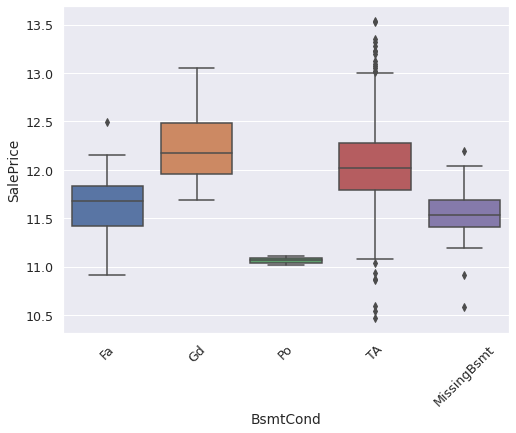

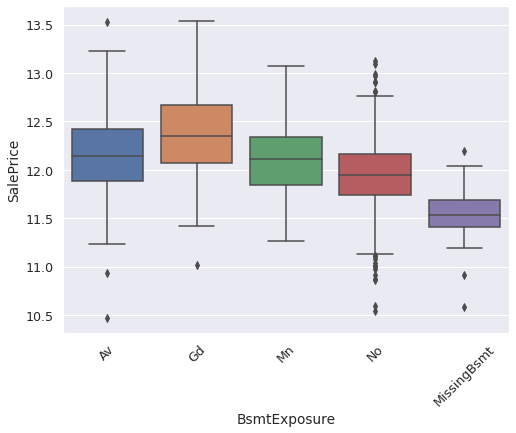

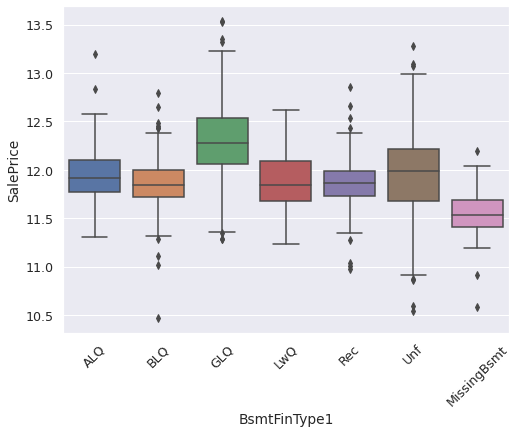

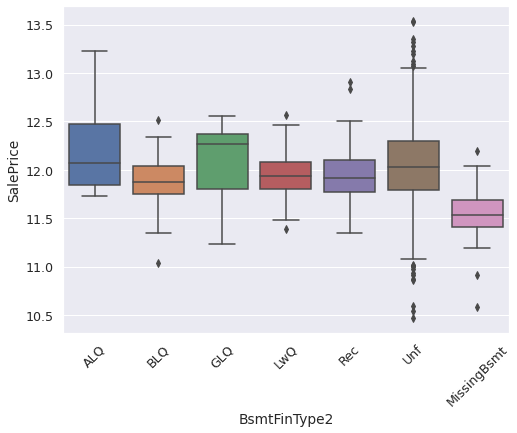

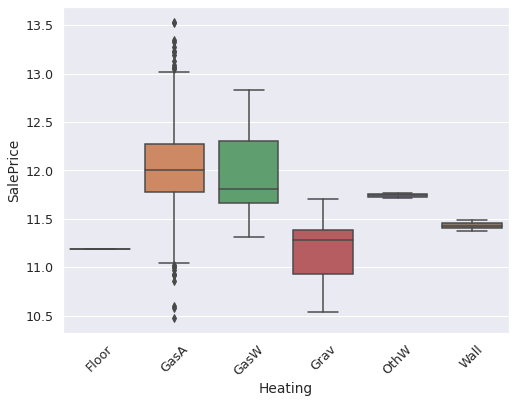

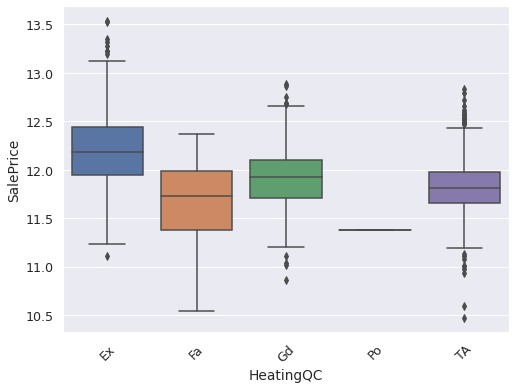

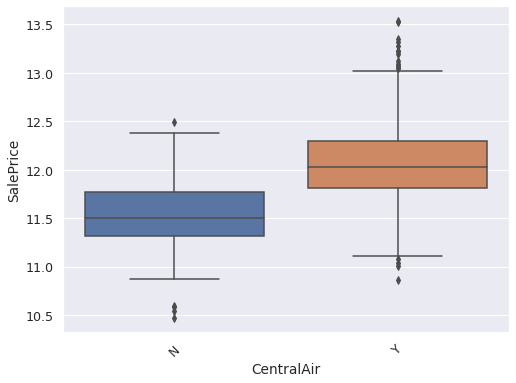

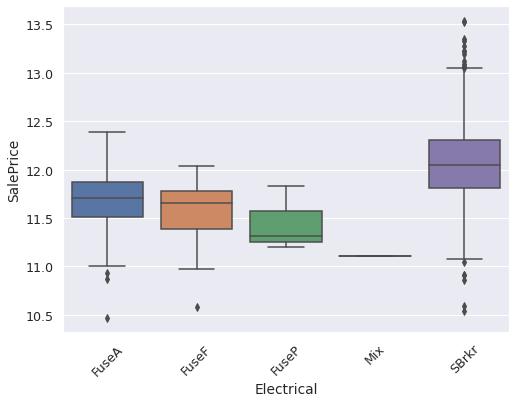

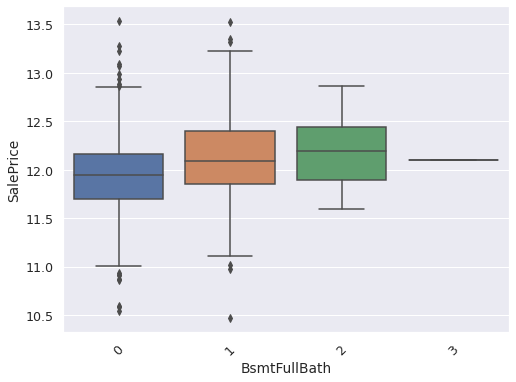

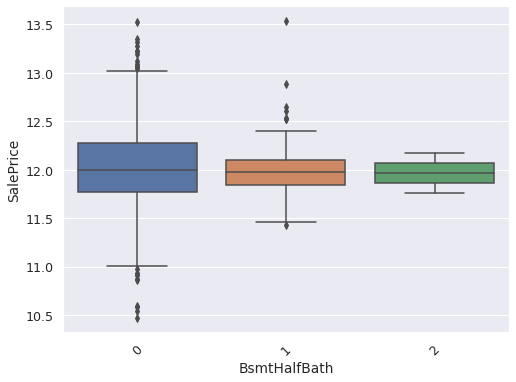

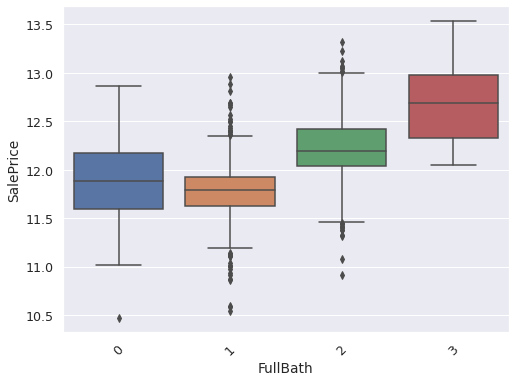

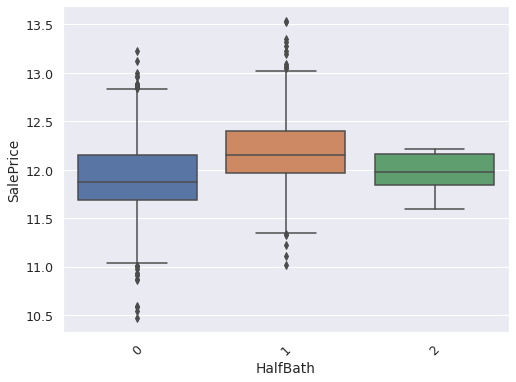

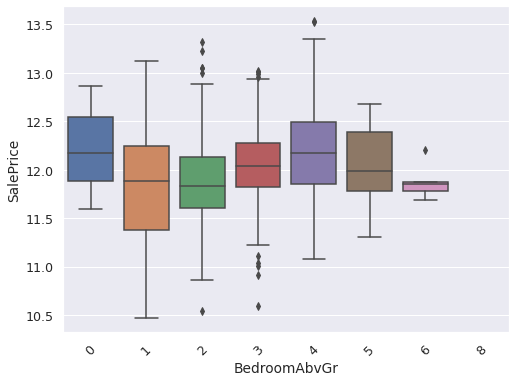

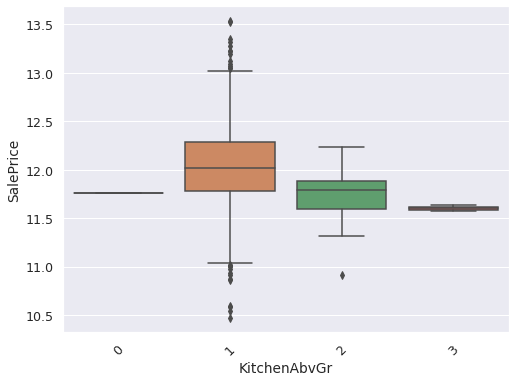

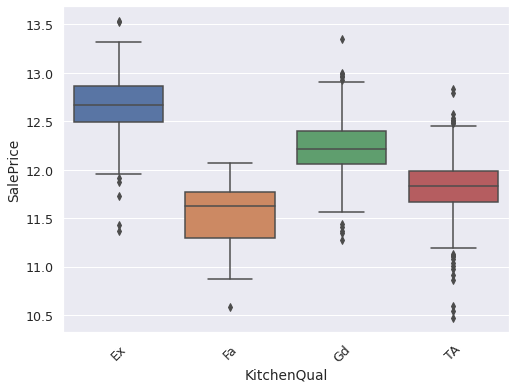

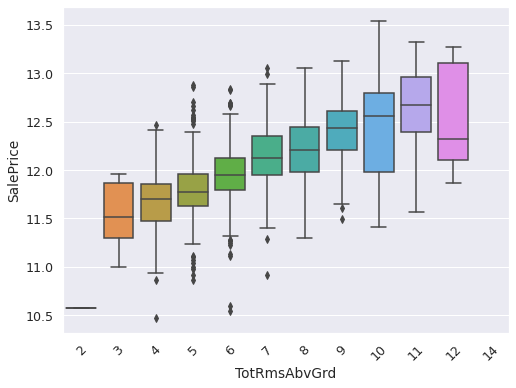

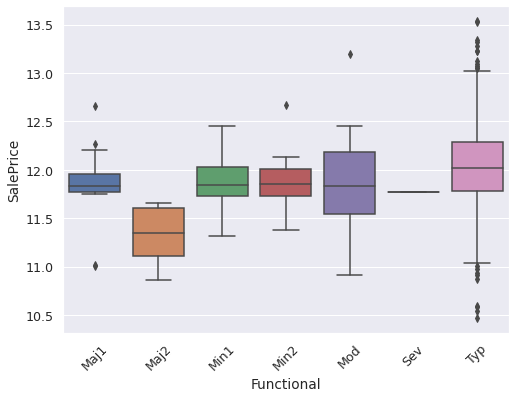

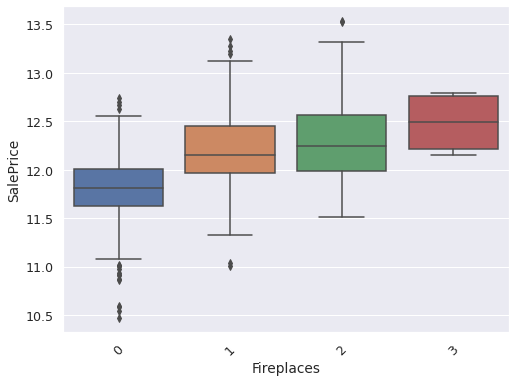

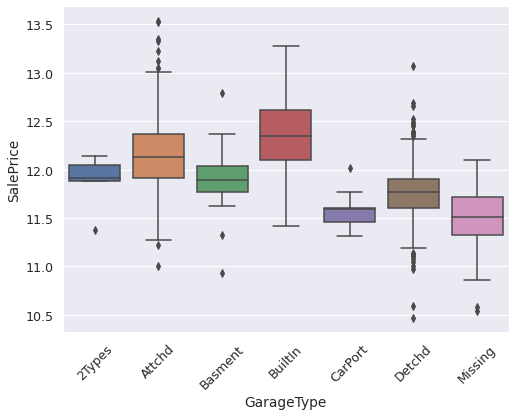

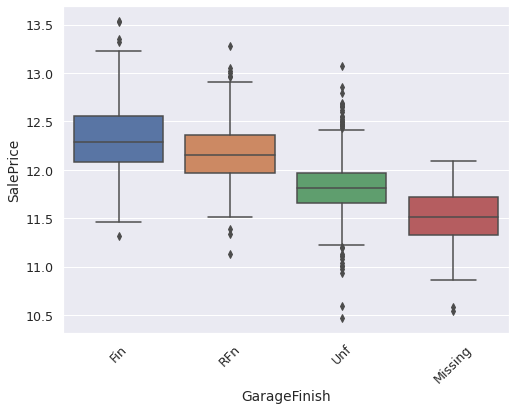

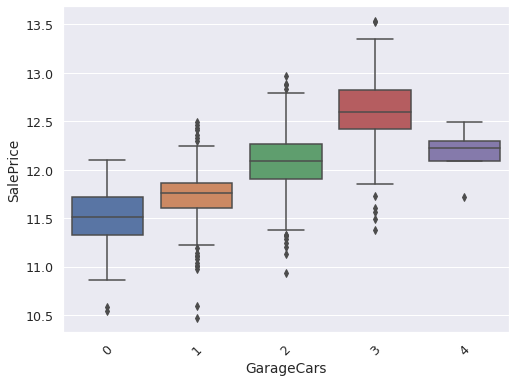

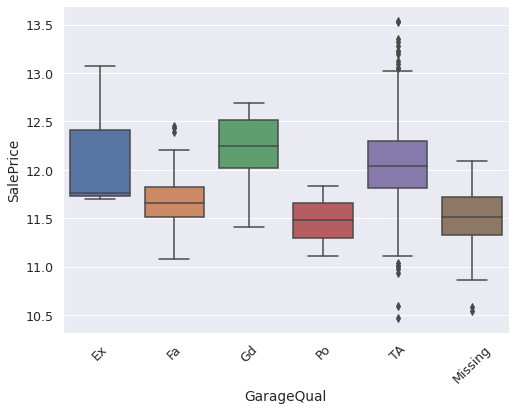

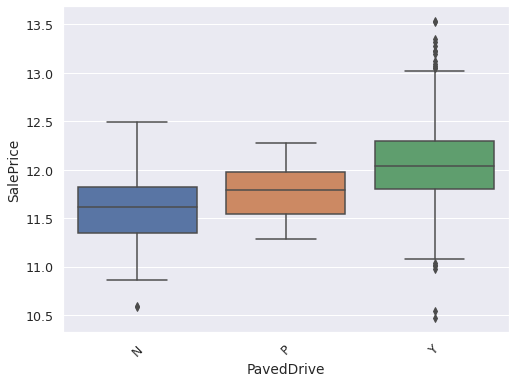

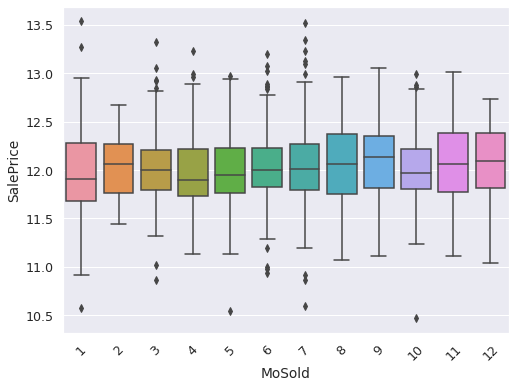

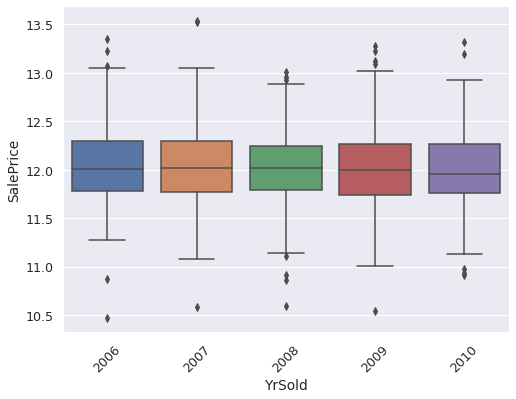

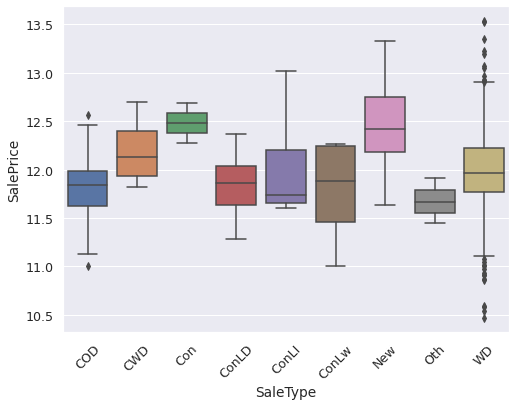

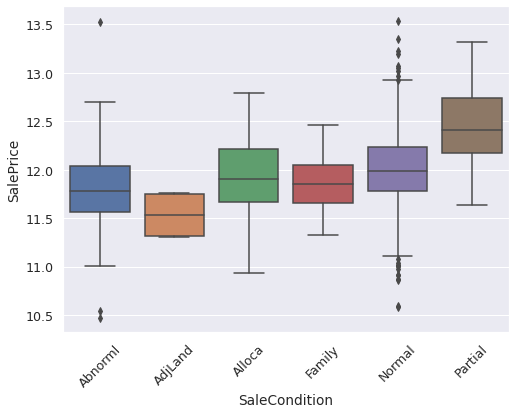

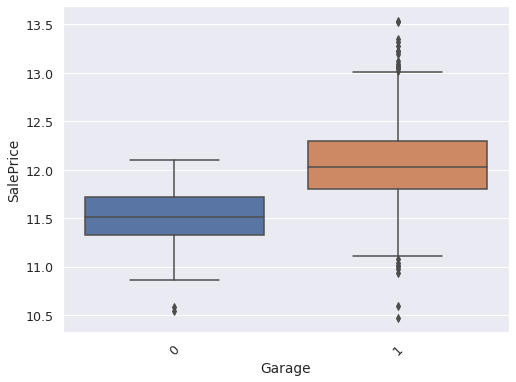

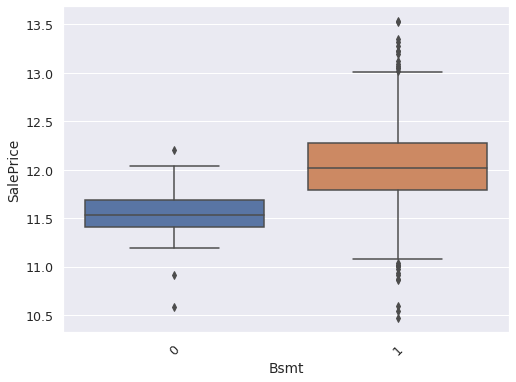

In [370]:
for var in cat_var:
  data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
  f, ax = plt.subplots(figsize=(8, 6))
  fig = sns.boxplot(x=var, y="SalePrice", data=data)
  ax.tick_params(axis='x', rotation=45)
  #fig.axis(ymin=0, ymax=800000)

We plotted a box plot between dependent variable `SalePrice` and each of the categorical independent variables. We noticed the following:
1. We can notice a difference between means of classes for the variables such as:
- `FullBath`, where class `3` has higher mean that the others
- `ExterQual`, where class `Excellent Quality` has higher mean that the others
- `Neighbourhood`

> `ANOVA` test is needed to determine if the difference between the means is statistically significant. But this would be needed in case of desire to determine which variable is influencing the dependent variable `SalePrice`. When the main goal is prediction, the model will handle that itself. For now we are just exploring around to get to know the story better.

2. There is a noticable positive trend in `OverallQual`, and a slight positive trend `YearBuilt` and `YearRemodAdd`.

We will construct the dummy variables for categorical features. We will apply the filter that if a categorical variable has more than 10 categories we will drop it. We will make an exception for `Neighbourhood` as there are some obvious differences between the classes.


